In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS'] # ÊîØÊåÅ‰∏≠Êñá
plt.rcParams['axes.unicode_minus'] = False # Ë¥üÂè∑Ê≠£Â∏∏ÊòæÁ§∫


df = pd.read_feather(
    r'C:\Users\ZHOU\Documents\2025CUHK\ÂÖ¥Èì∂\ÈúÄË¶ÅÊã∑ÁöÑÊï∞ÊçÆ\packages\L1_01\2024-09-11.feather'
)
print(df['stock_code'].unique())
#pd.set_option('display.max_rows',None)
#pd.reset_option('display.max_rows')
print(df.head(1000))


[     1      2      4 ... 688819 688981 689009]
       time  stock_code  open  high   low  close   volume       amount
0     93000           1  9.88  9.88  9.86   9.86   238800   2358816.00
1     93100           1  9.86  9.87  9.83   9.84  1136100  11192628.00
2     93200           1  9.83  9.86  9.83   9.86   362500   3567821.00
3     93300           1  9.85  9.86  9.83   9.84   833200   8200118.00
4     93400           1  9.84  9.84  9.82   9.83   703244   6911987.08
..      ...         ...   ...   ...   ...    ...      ...          ...
995  100100           7  4.74  4.74  4.73   4.74     3200     15145.00
996  100200           7  4.74  4.74  4.74   4.74      100       474.00
997  100300           7  4.73  4.73  4.73   4.73    18500     87505.00
998  100400           7  4.73  4.73  4.72   4.72    54800    258658.00
999  100500           7  4.71  4.71  4.71   4.71     8700     40977.00

[1000 rows x 8 columns]


In [ ]:
import pandas as pd
import numpy as np

# 1. ÂâîÈô§ÂºÄÁõòÂâç15ÂàÜÈíüÔºà9:30:00 ~ 9:44:00Ôºâ
df = df[df['time']>=94500] # 9:45‰πãÂêé
df['minute'] = df['time']//100
# 2. ÊâæÂà∞ÊØèÂè™ËÇ°Á•®ÊØèÂ§©Êàê‰∫§ÈáèÊúÄÂ§ßÁöÑ10‰∏™ÂàÜÈíüÔºàÊµ∑ÈáèÊó∂ÂàªÔºâ
top10 = (
df.groupby(['stock_code'], group_keys=False)
.apply(lambda x: x.nlargest(10, 'volume'))
.reset_index(drop=True)
)

top10

In [8]:
# 3. ÊåâÊó∂Èó¥ÊéíÂ∫èÔºåÁ≠õÈÄâ‚Äú‰ºòÂäøÊó∂Âàª‚Äù

def filter_advantage_minutes(x):
# xÂ∑≤ÊåâminuteÂçáÂ∫è
    diff = x['minute'].diff().fillna(9999)
    keep = (diff > 5)
    keep.iloc[0] = True #Á¨¨‰∏Ä‰∏™‰øùÁïô
    return x[keep]
top10 = top10.sort_values(['stock_code', 'minute'])
advantage = (
top10.groupby(['stock_code'], group_keys=False)
.apply(filter_advantage_minutes)
.reset_index(drop=True)
)
advantage

time  stock_code   open   high    low  close   volume       amount  \
0      101300           1   9.83   9.83   9.81   9.82  1502556  14755154.92   
1      110200           1   9.81   9.81   9.80   9.80  2921900  28656518.00   
2      111200           1   9.78   9.78   9.76   9.77  2672500  26124232.00   
3      130100           1   9.74   9.75   9.73   9.74  1452400  14141389.00   
4      130800           1   9.72   9.72   9.70   9.70  3086400  29977268.00   
...       ...         ...    ...    ...    ...    ...      ...          ...   
34379   95100      689009  45.83  46.10  45.83  46.07   163939   7531199.00   
34380  103700      689009  45.18  45.19  45.08  45.17    96810   4369692.00   
34381  131600      689009  44.13  44.28  44.13  44.28    98975   4377191.00   
34382  142200      689009  45.59  45.69  45.50  45.66   106992   4882568.00   
34383  143100      689009  45.68  45.84  45.61  45.77   102364   4684805.00   

       minute  future5_volume  
0        1013       2923956.0  
1        1102       6367000.0  
2        1112       5303100.0  
3        1301       2489900.0  
4        1308       7310928.0  
...       ...             ...  
34379     951        342012.0  
34380    1037        289389.0  
34381    1316        449349.0  
34382    1422        445688.0  
34383    1431        399104.0  

[34384 rows x 10 columns]

In [9]:
# 4. ËÆ°ÁÆóË∑üÈöèÁ≥ªÊï∞
# ËÆ°ÁÆóÊú™Êù•5ÂàÜÈíüÊàê‰∫§ÈáèÂíå
df['future5_volume'] = (
df.groupby(['stock_code'])['volume']
.apply(lambda x: x.rolling(window=5, min_periods=1).sum().shift(-4))
)
print(df[df['minute']==1013])

advantage = advantage.merge(
df[['stock_code', 'minute', 'future5_volume']],
on=['stock_code', 'minute'],
how='left'
)
advantage

           time  stock_code   open   high    low  close   volume       amount  \
43       101300           1   9.83   9.83   9.81   9.82  1502556  14755154.92   
284      101300           2   6.32   6.32   6.31   6.31   103600    654029.00   
525      101300           4  11.62  11.62  11.61  11.62    35300    410000.00   
766      101300           6   4.14   4.14   4.14   4.14    64400    266616.00   
1007     101300           7   4.71   4.72   4.71   4.72    22700    106920.00   
...         ...         ...    ...    ...    ...    ...      ...          ...   
1227938  101300      688799  38.13  38.13  38.13  38.13        0         0.00   
1228179  101300      688800  20.95  20.97  20.95  20.96    23598    494245.00   
1228420  101300      688819  27.48  27.52  27.45  27.52    37199   1022529.00   
1228661  101300      688981  44.08  44.09  44.07  44.07   106938   4713977.00   
1228902  101300      689009  45.57  45.58  45.54  45.54    33463   1524806.00   

         minute  future5_vo

time  stock_code   open   high    low  close   volume       amount  \
0      101300           1   9.83   9.83   9.81   9.82  1502556  14755154.92   
1      110200           1   9.81   9.81   9.80   9.80  2921900  28656518.00   
2      111200           1   9.78   9.78   9.76   9.77  2672500  26124232.00   
3      130100           1   9.74   9.75   9.73   9.74  1452400  14141389.00   
4      130800           1   9.72   9.72   9.70   9.70  3086400  29977268.00   
...       ...         ...    ...    ...    ...    ...      ...          ...   
34379   95100      689009  45.83  46.10  45.83  46.07   163939   7531199.00   
34380  103700      689009  45.18  45.19  45.08  45.17    96810   4369692.00   
34381  131600      689009  44.13  44.28  44.13  44.28    98975   4377191.00   
34382  142200      689009  45.59  45.69  45.50  45.66   106992   4882568.00   
34383  143100      689009  45.68  45.84  45.61  45.77   102364   4684805.00   

       minute  future5_volume_x  future5_volume_y  
0        1013         2923956.0         2923956.0  
1        1102         6367000.0         6367000.0  
2        1112         5303100.0         5303100.0  
3        1301         2489900.0         2489900.0  
4        1308         7310928.0         7310928.0  
...       ...               ...               ...  
34379     951          342012.0          342012.0  
34380    1037          289389.0          289389.0  
34381    1316          449349.0          449349.0  
34382    1422          445688.0          445688.0  
34383    1431          399104.0          399104.0  

[34384 rows x 11 columns]

In [ ]:
# ‚ÄúË∑üÈöèÁ≥ªÊï∞‚Äù = Ë∑üÈöèÊó∂ÂàªÔºàÊú™Êù•5ÂàÜÈíüÔºâÊàê‰∫§Èáè / ‰ºòÂäøÊó∂ÂàªÊàê‰∫§Èáè
advantage['follow_coef'] = advantage['future5_volume'] / advantage['volume']


## 2.1 ‚ÄúÂæÖËëóËÄåÊïë‚ÄùÂõ†Â≠êÊûÑÂª∫

In [18]:
import pandas as pd
import numpy as np
import glob
import os
from tqdm import tqdm  # ËøõÂ∫¶Êù°

data_dir = r'C:\Users\ZHOU\Documents\2025CUHK\ÂÖ¥Èì∂\ÈúÄË¶ÅÊã∑ÁöÑÊï∞ÊçÆ\packages\L1_01'
all_files = sorted(glob.glob(os.path.join(data_dir, '*.feather')))

result_list = []

for file in tqdm(all_files, desc="Processing files"):
    date_str = os.path.basename(file).split('.')[0]
    df = pd.read_feather(file)
    df['date'] = pd.to_datetime(date_str)
    # 1. ÂâîÈô§ÂºÄÁõòÂâç15ÂàÜÈíü
    df = df[df['time'] >= 94500]
    df['minute'] = df['time'] // 100
    # 2. ÊâæÂà∞ÊØèÂè™ËÇ°Á•®ÂΩìÂ§©Êàê‰∫§ÈáèÊúÄÂ§ßÁöÑ10‰∏™ÂàÜÈíü
    top10 = (
        df.groupby(['stock_code'], group_keys=False)
        .apply(lambda x: x.nlargest(10, 'volume'))
        .reset_index(drop=True)
    )
    # 3. ÊåâÊó∂Èó¥ÊéíÂ∫èÔºåÁ≠õÈÄâ‚Äú‰ºòÂäøÊó∂Âàª‚Äù
    def filter_advantage_minutes(x):
        diff = x['minute'].diff().fillna(9999)
        keep = (diff > 5)
        keep.iloc[0] = True
        return x[keep]
    top10 = top10.sort_values(['stock_code', 'minute'])
    advantage = (
        top10.groupby(['stock_code'], group_keys=False)
        .apply(filter_advantage_minutes)
        .reset_index(drop=True)
    )
    # 4. ËÆ°ÁÆóÊú™Êù•5ÂàÜÈíüÊàê‰∫§ÈáèÂíå
    df['future5_volume'] = (
        df.groupby(['stock_code'])['volume']
        .apply(lambda x: x.rolling(window=5, min_periods=1).sum().shift(-4))
    )
    # 5. ÂêàÂπ∂ÔºåËÆ°ÁÆóË∑üÈöèÁ≥ªÊï∞
    advantage = advantage.merge(
        df[['stock_code', 'minute', 'future5_volume']],
        on=['stock_code', 'minute'],
        how='left'
    )
    advantage['follow_coef'] = advantage['future5_volume'] / advantage['volume']
    # 6. ËÆ°ÁÆóÊØèÂè™ËÇ°Á•®ÂΩìÂ§©ÁöÑ‚ÄúÊó•Ë∑üÈöèÁ≥ªÊï∞‚Äù
    daily_follow = (
        advantage.groupby(['stock_code'])['follow_coef']
        .mean()
        .reset_index()
    )
    daily_follow['date'] = pd.to_datetime(date_str)
    result_list.append(daily_follow)

# ÂêàÂπ∂ÊâÄÊúâÂ§©ÁöÑÁªìÊûú
all_daily_follow = pd.concat(result_list, ignore_index=True)

Processing files: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 120/120 [20:31<00:00, 10.26s/it]


In [19]:
# Â∞ÜÊï∞ÊçÆËΩ¨Êç¢‰∏∫pivotÊ†ºÂºèÔºöË°å‰∏∫Êó•ÊúüÔºåÂàó‰∏∫ËÇ°Á•®‰ª£Á†ÅÔºåÂÄº‰∏∫follow_coef
factor_pivot = all_daily_follow.pivot(index='date', columns='stock_code', values='follow_coef')

# ËÆæÁΩÆindexÂêçÁß∞‰∏∫'_id'Ôºà‰∏éÊ®°Êùø‰∏ÄËá¥Ôºâ
factor_pivot.index.name = '_id'

print(factor_pivot)

stock_code    1         2         4         6         7         8       \
_id                                                                      
2024-09-11  2.051658  2.148450  4.158168  2.723409  1.615952  1.839810   
2024-09-12  1.990439  2.567592  2.266072  2.165165  2.011063  1.822253   
2024-09-13  2.080822  2.957725  2.536987  4.113358  1.977389  1.657421   
2024-09-18  2.262986  3.533628  2.875446  3.618305  3.010509  1.720943   
2024-09-19  2.783150  2.888350  3.473568  2.271776  3.008905  1.695503   
...              ...       ...       ...       ...       ...       ...   
2025-03-11  2.488950  2.995008  2.341884  4.584284  1.610365  1.379181   
2025-03-12  2.550884  2.627577  1.979504  2.338218  1.675615  1.620694   
2025-03-13  2.657366  1.902581  2.596933  1.888820  2.130606  2.362888   
2025-03-14  2.562692  2.294540  2.192503  2.480475  2.299013  1.654479   
2025-03-17  2.731421  2.947614  2.186184  2.073409  2.518570  1.900274   

stock_code    9         10        11 

In [ ]:
# ‰øùÂ≠òfactor_pivot‰∏∫pklÊñá‰ª∂
factor_pivot.to_pickle(r'C:\Users\ZHOU\Documents\2025CUHK\ÂÖ¥Èì∂\ÈúÄË¶ÅÊã∑ÁöÑÊï∞ÊçÆ\packages\report2\factor_pivot.pkl')

print("factor_pivotÂ∑≤‰øùÂ≠ò‰∏∫pklÊñá‰ª∂")

In [1]:
# Âä†ËΩΩfactor_pivot
import pickle
import pandas as pd
factor_pivot = pd.read_pickle(r'C:\Users\ZHOU\Documents\2025CUHK\ÂÖ¥Èì∂\ÈúÄË¶ÅÊã∑ÁöÑÊï∞ÊçÆ\packages\report2\factor_pivot.pkl')

print("factor_pivotÂ∑≤ÊàêÂäüÂä†ËΩΩ")

factor_pivotÂ∑≤ÊàêÂäüÂä†ËΩΩ


In [2]:
factor_pivot

stock_code    1         2         4         6         7         8       \
_id                                                                      
2024-09-11  2.051658  2.148450  4.158168  2.723409  1.615952  1.839810   
2024-09-12  1.990439  2.567592  2.266072  2.165165  2.011063  1.822253   
2024-09-13  2.080822  2.957725  2.536987  4.113358  1.977389  1.657421   
2024-09-18  2.262986  3.533628  2.875446  3.618305  3.010509  1.720943   
2024-09-19  2.783150  2.888350  3.473568  2.271776  3.008905  1.695503   
...              ...       ...       ...       ...       ...       ...   
2025-03-11  2.488950  2.995008  2.341884  4.584284  1.610365  1.379181   
2025-03-12  2.550884  2.627577  1.979504  2.338218  1.675615  1.620694   
2025-03-13  2.657366  1.902581  2.596933  1.888820  2.130606  2.362888   
2025-03-14  2.562692  2.294540  2.192503  2.480475  2.299013  1.654479   
2025-03-17  2.731421  2.947614  2.186184  2.073409  2.518570  1.900274   

stock_code    9         10        11        12      ...    688787    688788  \
_id                                                 ...                       
2024-09-11  3.572286  1.835153  1.769737  2.240087  ...  3.023436  1.316933   
2024-09-12  2.995069  2.508835  1.813250  1.722551  ...  2.679705  1.173909   
2024-09-13  2.127718  1.533062  3.089195  2.373046  ...  2.378855  1.272201   
2024-09-18  2.620372  2.418042  4.007233  2.000908  ...  2.168525  1.789976   
2024-09-19  4.133602  2.014826  2.594997  1.503584  ...  2.305206  1.576713   
...              ...       ...       ...       ...  ...       ...       ...   
2025-03-11  2.962227  1.736785  2.572574  1.686306  ...  2.472110  2.745183   
2025-03-12  1.966026  1.730205  2.386193  1.744435  ...  1.955161  2.238277   
2025-03-13  1.637471  1.747402  1.963852  1.746103  ...  3.813724  3.049713   
2025-03-14  1.971364  1.820533  1.867839  1.464287  ...  2.035813  2.951961   
2025-03-17  2.225693  1.922269  2.530430  1.658454  ...  1.840819  2.089694   

stock_code    688789    688793    688798    688799    688800    688819  \
_id                                                                      
2024-09-11  1.643344  1.924071  2.176542  1.668192  1.873719  3.342741   
2024-09-12  1.677082  1.603067  1.861780  1.712406  1.743495  2.412563   
2024-09-13  2.316394  2.005330  2.220283  1.739437  1.755443  2.621820   
2024-09-18  2.298142  1.615238  2.135338  1.805541  2.097161  2.608310   
2024-09-19  1.846707  2.111078  2.343487  1.668038  2.840575  3.027150   
...              ...       ...       ...       ...       ...       ...   
2025-03-11  1.564963  2.348507  2.608729  1.560539  3.020077  2.317252   
2025-03-12  2.437605  2.384169  2.842718  1.636603  3.426626  2.512285   
2025-03-13  2.976205  2.003783  2.269070  2.653203  4.014674  2.864455   
2025-03-14  2.770563  3.352321  2.255546  2.579190  3.763998  1.904116   
2025-03-17  2.226533  2.059387  3.510622  2.932825  2.264812  1.772218   

stock_code    688981    689009  
_id                             
2024-09-11  2.652717  3.535996  
2024-09-12  2.702912  3.431362  
2024-09-13  3.008210  4.002777  
2024-09-18  2.590874  3.121547  
2024-09-19  2.883669  4.398248  
...              ...       ...  
2025-03-11  3.804841  2.458827  
2025-03-12  3.071468  2.469992  
2025-03-13  2.641684  2.661429  
2025-03-14  2.918823  3.184552  
2025-03-17  3.226314  2.761769  

[120 rows x 5143 columns]

In [5]:
from config import load_data_local, prepare_dates, neutralize, backtest_stand
# 1. ÂØπÊØèÂè™ËÇ°Á•®ËÆ°ÁÆóËøáÂéª20Â§©ÁöÑrollingÂùáÂÄºÂíåÊ†áÂáÜÂ∑Æ
mean_20d = factor_pivot.rolling(window=20, min_periods=1).mean()
std_20d = factor_pivot.rolling(window=20, min_periods=1).std()

start_date = '2024-09-11'
end_date = '2025-03-17'
month_end_dates = prepare_dates(start_date, end_date, fre='month')

monthly_mean = factor_pivot.rolling(window=20, min_periods=1).mean().loc[month_end_dates]
monthly_std = factor_pivot.rolling(window=20, min_periods=1).std().loc[month_end_dates]

# Â∞ÜindexËΩ¨ÂõûstrÊ†ºÂºèÁöÑYYYY-MM-DD
monthly_mean.index = monthly_mean.index.strftime('%Y-%m-%d')
monthly_std.index = monthly_std.index.strftime('%Y-%m-%d')

# Á°Æ‰øùcolumns‰∏∫6‰ΩçstrÊ†ºÂºèÁöÑËÇ°Á•®‰ª£Á†Å
monthly_mean.columns = monthly_mean.columns.astype(str).str.zfill(6)
monthly_std.columns = monthly_std.columns.astype(str).str.zfill(6)

# ËÆ°ÁÆóÂêàÊàêÁöÑ"ÂæÖËëóËÄåÊïë"Âõ†Â≠êÔºàÁ≠âÊùÉÂπ≥ÂùáÔºâ
final_factor = (monthly_mean + monthly_std) / 2
final_factor.columns = final_factor.columns.astype(str).str.zfill(6)

print("ÊúàÂùáÂæÖËëóËÄåÊïëÂõ†Â≠êÔºö")
print(monthly_mean)
print("\nÊúàÁ®≥ÂæÖËëóËÄåÊïëÂõ†Â≠êÔºö")
print(monthly_std.head())
print("\nÂæÖËëóËÄåÊïëÂõ†Â≠êÔºö")
print(final_factor.head())

ÊúàÂùáÂæÖËëóËÄåÊïëÂõ†Â≠êÔºö
stock_code  000001  000002  000004  000006  000007  000008  000009  000010  \
_id                                                                          
2024-09-30  2.3952  2.8243  3.1834  2.8480  2.2057  1.8642  2.8758  2.0631   
2024-10-31  2.6894  3.1910  3.8729  3.2745  2.1802  2.0367  2.6513  2.1880   
2024-11-29  2.7150  2.8128  3.3680  3.2720  2.7023  2.1212  2.6235  2.6666   
2024-12-31  2.5692  2.6824  3.0320  2.6987  2.4524  2.7964  2.2277  2.6540   
2025-01-27  2.6656  2.5523  2.6672  2.8162  2.0514  2.1205  2.1854  2.2493   
2025-02-28  2.5104  2.9716  2.7525  2.4160  2.1058  2.4492  2.5244  1.8941   

stock_code  000011  000012  000014  000016  000017  000019  000020  000021  \
_id                                                                          
2024-09-30  2.8156  1.9952  2.8582  3.6666  2.3118  2.3305  4.1740  2.8937   
2024-10-31  2.8092  2.3023  3.0733  2.7013  2.4255  2.4356  2.9764  3.4512   
2024-11-29  2.5270  2.5607  2.7058 

## 2.2 ‚ÄúÂæÖËëóËÄåÊïë‚ÄùÂõ†Â≠êË°®Áé∞ÊµãËØï

load data locally from 2009-01-05 to 2025-04-15
Â§öÂ§¥Ë∂ÖÈ¢ù:
             2024    2025   mean
Âπ¥ÂåñË∂ÖÈ¢ù   0.2650 -0.0679 0.0985
Ê≥¢Âä®Áéá     0.0996  0.0673 0.0835
ÊúÄÂ§ßÂõûÊí§   0.0336  0.0325 0.0336
Â§èÊôÆÁéá     2.6609 -1.0089 1.1804
Êî∂ÁõäÂõûÊí§ÊØî 7.8808 -2.0913 2.9301
ÂçäÊ≥¢       0.0272  0.0184 0.0228
ÂçäÂ§èÊôÆ     9.7360 -3.6835 4.3153


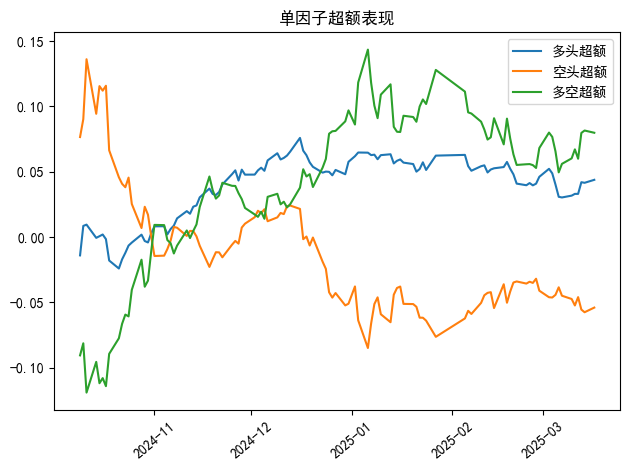

Âπ≥ÂùáÂçïËæπÊç¢ÊâãÔºö0.546
Âπ¥Âåñ‰∫§ÊòìÊàêÊú¨:0.004 (Êú™Âú®Ë∂ÖÈ¢ù‰∏≠Êâ£Èô§)


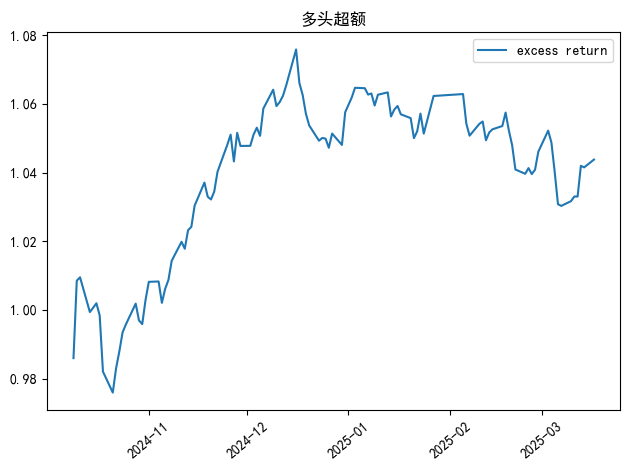

Rank IC: 6.65%
Rank ICIR: 0.82
tÂÄº: 2.00
Âπ¥ÂåñÊî∂ÁõäÁéá: 9.85%
Âπ¥ÂåñÊ≥¢Âä®Áéá: 8.35%
‰ø°ÊÅØÊØîÁéá: 1.18
Â§èÊôÆÊØîÁéá: 1.18
ÊúÄÂ§ßÂõûÊí§: 3.36%


In [23]:
# ÊúàÂùáÂæÖËëóËÄåÊïëÂõ†Â≠êÂõûÊµã
pkg_path=r'C:\Users\ZHOU\Documents\2025CUHK\ÂÖ¥Èì∂\ÈúÄË¶ÅÊã∑ÁöÑÊï∞ÊçÆ\\'
res = backtest_stand(
    -monthly_mean,
    fre='month',
    stock_pool='888888',
    benchmark='b4',
    barra_neutral=True, # ‰∏≠ÊÄßÂåñ
    top=300,
    localdata_path=pkg_path+'packages/frdata',
    start='2024-10-01',
    end='2025-03-17'
)
# Rank IC
rank_ic = res['ic']['ic'].mean()
# Rank ICIR
rank_icir = res['ic']['ic'].mean() / res['ic']['ic'].std()
# tÂÄº
t_value = res['ic']['ic'].mean() / (res['ic']['ic'].std() / np.sqrt(res['ic']['ic'].count()))
perf = res['Â§öÁ©∫Ë°®Áé∞']['Â§öÂ§¥Ë°®Áé∞']  
annual_return = perf.loc['Âπ¥ÂåñË∂ÖÈ¢ù', 'mean']  # Âπ¥ÂåñÊî∂ÁõäÁéá
annual_vol = perf.loc['Ê≥¢Âä®Áéá', 'mean']      # Âπ¥ÂåñÊ≥¢Âä®Áéá
info_ratio = perf.loc['‰ø°ÊÅØÊØîÁéá', 'mean'] if '‰ø°ÊÅØÊØîÁéá' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['ËÉúÁéá', 'mean'] if 'ËÉúÁéá' in perf.index else perf.loc['Ê≠£ÊúàÊï∞', 'mean'] / perf.loc['ÊÄªÊúàÊï∞', 'mean']
max_drawdown = perf.loc['ÊúÄÂ§ßÂõûÊí§', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"tÂÄº: {t_value:.2f}")
print(f"Âπ¥ÂåñÊî∂ÁõäÁéá: {annual_return:.2%}")
print(f"Âπ¥ÂåñÊ≥¢Âä®Áéá: {annual_vol:.2%}")
print(f"‰ø°ÊÅØÊØîÁéá: {info_ratio:.2f}")
print(f"Â§èÊôÆÊØîÁéá: {sharpe_ratio:.2f}")
#print(f"ÊúàÂ∫¶ËÉúÁéá: {win_rate:.2%}")
print(f"ÊúÄÂ§ßÂõûÊí§: {max_drawdown:.2%}")

In [21]:
# ÂàÜÊûêÊåÅ‰ªìÈõÜ‰∏≠Â∫¶
import pandas as pd

# Â§öÂ§¥ÊåÅ‰ªìÈõÜ‰∏≠Â∫¶ÔºàÂâç10Âè™ËÇ°Á•®ÊùÉÈáçÔºâ
long_concentration = res['Â§öÁ©∫ÊåÅ‰ªì']['Â§öÂ§¥ÊåÅ‰ªì'][0].head(10).sum()
print(f"Â§öÂ§¥Ââç10Âè™ËÇ°Á•®ÊùÉÈáçÂç†ÊØî: {long_concentration:.2%}")

# Ê£ÄÊü•ÊùÉÈáçÊòØÂê¶ÂêàÁêÜÔºàÂ∫îËØ•Êé•Ëøë100%Ôºâ
total_weight = res['Â§öÁ©∫ÊåÅ‰ªì']['Â§öÂ§¥ÊåÅ‰ªì'][0].sum()
print(f"Â§öÂ§¥ÊÄªÊùÉÈáç: {total_weight:.2%}")

Â§öÂ§¥Ââç10Âè™ËÇ°Á•®ÊùÉÈáçÂç†ÊØî: 5.44%
Â§öÂ§¥ÊÄªÊùÉÈáç: 100.00%


load data locally from 2009-01-05 to 2025-04-15
Â§öÂ§¥Ë∂ÖÈ¢ù:
             2024    2025   mean
Âπ¥ÂåñË∂ÖÈ¢ù   0.3326  0.1791 0.2559
Ê≥¢Âä®Áéá     0.1250  0.0661 0.0956
ÊúÄÂ§ßÂõûÊí§   0.0451  0.0116 0.0451
Â§èÊôÆÁéá     2.6610  2.7095 2.6778
Êî∂ÁõäÂõûÊí§ÊØî 7.3739 15.4125 5.6726
ÂçäÊ≥¢       0.0407  0.0153 0.0280
ÂçäÂ§èÊôÆ     8.1638 11.7109 9.1320


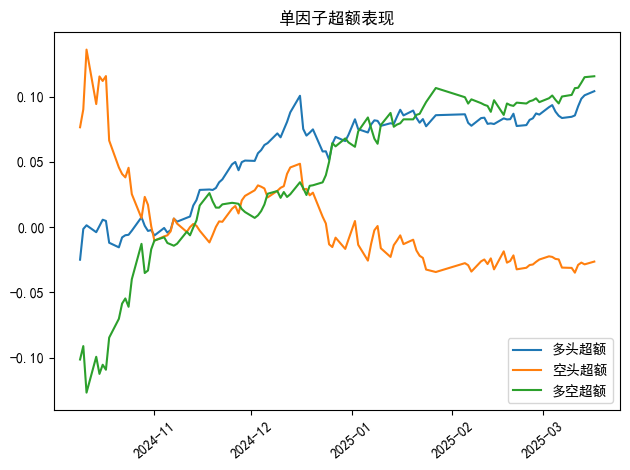

Âπ≥ÂùáÂçïËæπÊç¢ÊâãÔºö0.827
Âπ¥Âåñ‰∫§ÊòìÊàêÊú¨:0.006 (Êú™Âú®Ë∂ÖÈ¢ù‰∏≠Êâ£Èô§)


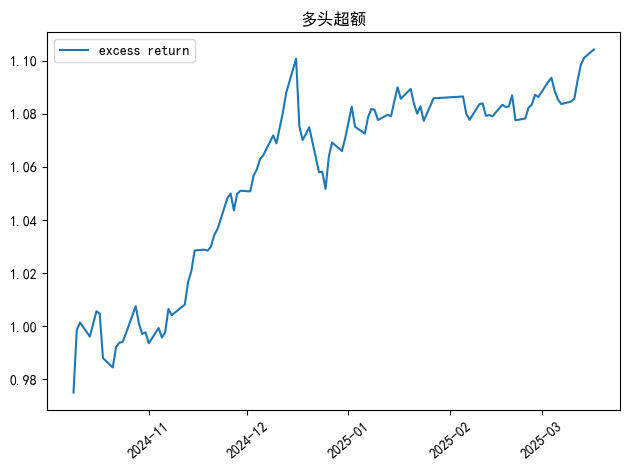

Rank IC: 6.27%
Rank ICIR: 1.02
tÂÄº: 2.50
Âπ¥ÂåñÊî∂ÁõäÁéá: 25.59%
Âπ¥ÂåñÊ≥¢Âä®Áéá: 9.56%
‰ø°ÊÅØÊØîÁéá: 2.68
Â§èÊôÆÊØîÁéá: 2.68
ÊúÄÂ§ßÂõûÊí§: 4.51%


In [153]:
# ÊúàÁ®≥ÂæÖËëóËÄåÊïëÂõ†Â≠êÂõûÊµã
res = backtest_stand(
    -monthly_std,
    fre='month',
    stock_pool='888888',
    benchmark='b4',
    barra_neutral=True, # ‰∏≠ÊÄßÂåñ
    top=300,
    localdata_path=pkg_path+'packages/frdata',
    start='2024-09-31',
    end='2025-03-17'
)
# Rank IC
rank_ic = res['ic']['ic'].mean()
# Rank ICIR
rank_icir = res['ic']['ic'].mean() / res['ic']['ic'].std()
# tÂÄº
t_value = res['ic']['ic'].mean() / (res['ic']['ic'].std() / np.sqrt(res['ic']['ic'].count()))
perf = res['Â§öÁ©∫Ë°®Áé∞']['Â§öÂ§¥Ë°®Áé∞']  
annual_return = perf.loc['Âπ¥ÂåñË∂ÖÈ¢ù', 'mean']  # Âπ¥ÂåñÊî∂ÁõäÁéá
annual_vol = perf.loc['Ê≥¢Âä®Áéá', 'mean']      # Âπ¥ÂåñÊ≥¢Âä®Áéá
info_ratio = perf.loc['‰ø°ÊÅØÊØîÁéá', 'mean'] if '‰ø°ÊÅØÊØîÁéá' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['ËÉúÁéá', 'mean'] if 'ËÉúÁéá' in perf.index else perf.loc['Ê≠£ÊúàÊï∞', 'mean'] / perf.loc['ÊÄªÊúàÊï∞', 'mean']
max_drawdown = perf.loc['ÊúÄÂ§ßÂõûÊí§', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"tÂÄº: {t_value:.2f}")
print(f"Âπ¥ÂåñÊî∂ÁõäÁéá: {annual_return:.2%}")
print(f"Âπ¥ÂåñÊ≥¢Âä®Áéá: {annual_vol:.2%}")
print(f"‰ø°ÊÅØÊØîÁéá: {info_ratio:.2f}")
print(f"Â§èÊôÆÊØîÁéá: {sharpe_ratio:.2f}")
#print(f"ÊúàÂ∫¶ËÉúÁéá: {win_rate:.2%}")
print(f"ÊúÄÂ§ßÂõûÊí§: {max_drawdown:.2%}")

load data locally from 2009-01-05 to 2025-04-15
Â§öÂ§¥Ë∂ÖÈ¢ù:
              2024    2025   mean
Âπ¥ÂåñË∂ÖÈ¢ù    0.3703 -0.0068 0.1817
Ê≥¢Âä®Áéá      0.1038  0.0649 0.0843
ÊúÄÂ§ßÂõûÊí§    0.0316  0.0262 0.0316
Â§èÊôÆÁéá      3.5685 -0.1043 2.1553
Êî∂ÁõäÂõûÊí§ÊØî 11.7052 -0.2588 5.7456
ÂçäÊ≥¢        0.0297  0.0172 0.0235
ÂçäÂ§èÊôÆ     12.4529 -0.3926 7.7373


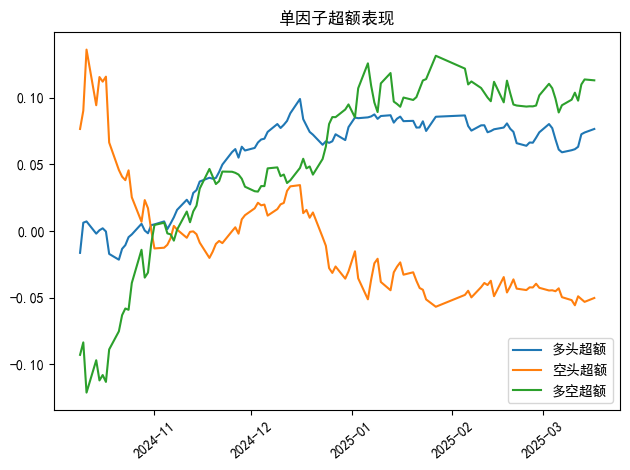

Âπ≥ÂùáÂçïËæπÊç¢ÊâãÔºö0.639
Âπ¥Âåñ‰∫§ÊòìÊàêÊú¨:0.005 (Êú™Âú®Ë∂ÖÈ¢ù‰∏≠Êâ£Èô§)


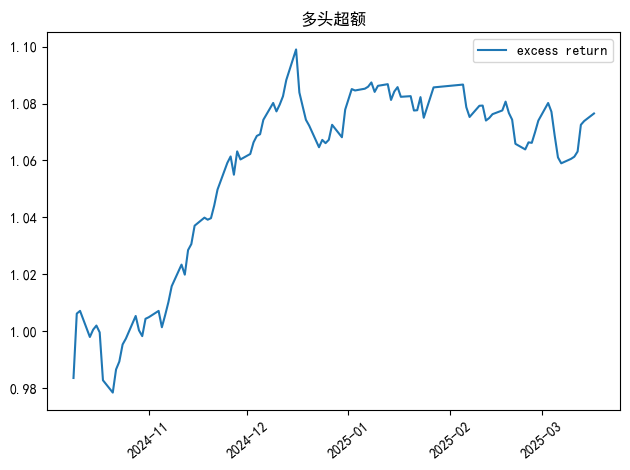

Rank IC: 6.80%
Rank ICIR: 0.94
tÂÄº: 2.30
Âπ¥ÂåñÊî∂ÁõäÁéá: 18.17%
Âπ¥ÂåñÊ≥¢Âä®Áéá: 8.43%
‰ø°ÊÅØÊØîÁéá: 2.16
ÊúÄÂ§ßÂõûÊí§: 3.16%


In [17]:
# ÂæÖËëóËÄåÊïëÂõ†Â≠êÂõûÊµã
import numpy as np
res = backtest_stand(
    -final_factor,
    fre='month',
    stock_pool='888888',
    benchmark='b4',
    barra_neutral=True, # ‰∏≠ÊÄßÂåñ
    top=300,
    localdata_path=pkg_path+'packages/frdata',
    start='2024-09-31',
    end='2025-03-17'
)
# Rank IC
rank_ic = res['ic']['ic'].mean()
# Rank ICIR
rank_icir = res['ic']['ic'].mean() / res['ic']['ic'].std()
# tÂÄº
t_value = res['ic']['ic'].mean() / (res['ic']['ic'].std() / np.sqrt(res['ic']['ic'].count()))
perf = res['Â§öÁ©∫Ë°®Áé∞']['Â§öÂ§¥Ë°®Áé∞']  
annual_return = perf.loc['Âπ¥ÂåñË∂ÖÈ¢ù', 'mean']  # Âπ¥ÂåñÊî∂ÁõäÁéá
annual_vol = perf.loc['Ê≥¢Âä®Áéá', 'mean']      # Âπ¥ÂåñÊ≥¢Âä®Áéá
info_ratio = perf.loc['‰ø°ÊÅØÊØîÁéá', 'mean'] if '‰ø°ÊÅØÊØîÁéá' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['ËÉúÁéá', 'mean'] if 'ËÉúÁéá' in perf.index else perf.loc['Ê≠£ÊúàÊï∞', 'mean'] / perf.loc['ÊÄªÊúàÊï∞', 'mean']
max_drawdown = perf.loc['ÊúÄÂ§ßÂõûÊí§', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"tÂÄº: {t_value:.2f}")
print(f"Âπ¥ÂåñÊî∂ÁõäÁéá: {annual_return:.2%}")
print(f"Âπ¥ÂåñÊ≥¢Âä®Áéá: {annual_vol:.2%}")
print(f"‰ø°ÊÅØÊØîÁéá: {info_ratio:.2f}")
#print(f"ÊúàÂ∫¶ËÉúÁéá: {win_rate:.2%}")
print(f"ÊúÄÂ§ßÂõûÊí§: {max_drawdown:.2%}")

## 2.3 Ââ•Á¶ªÂÖ∂‰ªñÈ£éÊ†ºÂõ†Â≠êÂΩ±ÂìçÂêé‚ÄúÂæÖËëóËÄåÊïë‚ÄùÂõ†Â≠ê


ÂèØÁî®ÁöÑBarraÂõ†Â≠ê: ['SIZE', 'SIZENL', 'EARNYILD', 'GROWTH', 'LEVERAGE', 'BTOP', 'LIQUIDTY', 'MOMENTUM', 'RESVOL', 'BETA']
ÂÖ±ÂêåÊó∂Èó¥ÁÇπ: 6‰∏™
Êó∂Èó¥ËåÉÂõ¥: 2024-09-30 Âà∞ 2025-02-28
Â∏ÇÂÄº      :   13.00% (Âü∫‰∫é6‰∏™Êó∂Èó¥ÁÇπ)
ÈùûÁ∫øÊÄßÂ∏ÇÂÄº   :    4.68% (Âü∫‰∫é6‰∏™Êó∂Èó¥ÁÇπ)
ÁõàÂà©      :  -15.55% (Âü∫‰∫é6‰∏™Êó∂Èó¥ÁÇπ)
ÊàêÈïø      :   -0.82% (Âü∫‰∫é6‰∏™Êó∂Èó¥ÁÇπ)
Êù†ÊùÜ      :   -5.03% (Âü∫‰∫é6‰∏™Êó∂Èó¥ÁÇπ)
ÂàÜÁ∫¢      :  -26.51% (Âü∫‰∫é6‰∏™Êó∂Èó¥ÁÇπ)
ÊµÅÂä®ÊÄß     :   47.55% (Âü∫‰∫é6‰∏™Êó∂Èó¥ÁÇπ)
ÂèçËΩ¨      :   21.56% (Âü∫‰∫é6‰∏™Êó∂Èó¥ÁÇπ)
Ê≥¢Âä®Áéá     :   40.82% (Âü∫‰∫é6‰∏™Êó∂Èó¥ÁÇπ)
Ë¥ùÂ°î      :   13.54% (Âü∫‰∫é6‰∏™Êó∂Èó¥ÁÇπ)


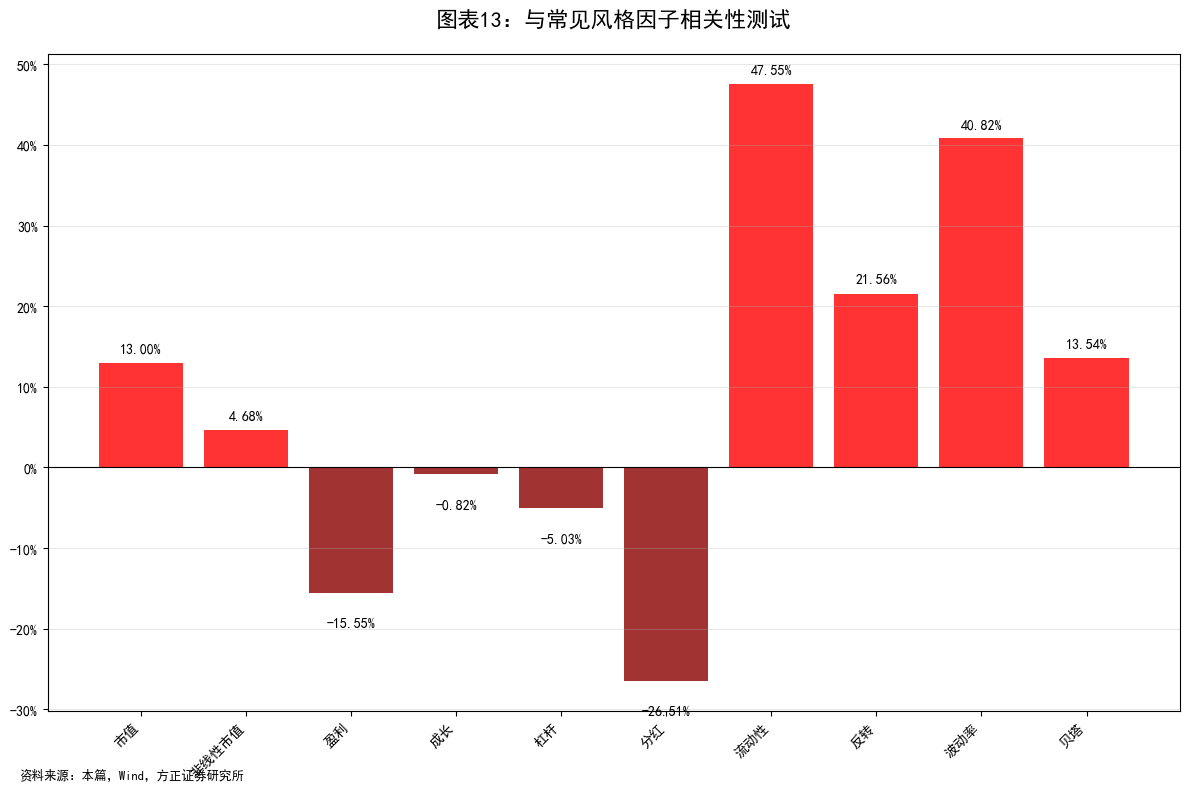

In [11]:
from scipy.stats import pearsonr
# =============================================================================
# BarraÂõ†Â≠êmapping
# =============================================================================

barra_factor_mapping = {
    'SIZE': 'Â∏ÇÂÄº',
    'SIZENL': 'ÈùûÁ∫øÊÄßÂ∏ÇÂÄº', 
    'EARNYILD': 'ÁõàÂà©',
    'GROWTH': 'ÊàêÈïø',
    'LEVERAGE': 'Êù†ÊùÜ',
    'BTOP': 'ÂàÜÁ∫¢',
    'LIQUIDTY': 'ÊµÅÂä®ÊÄß',
    'MOMENTUM': 'ÂèçËΩ¨',
    'RESVOL': 'Ê≥¢Âä®Áéá',
    'BETA': 'Ë¥ùÂ°î'
}

print(f"ÂèØÁî®ÁöÑBarraÂõ†Â≠ê: {list(barra_factor_mapping.keys())}")

# =============================================================================
# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
# =============================================================================



def calculate_factor_correlation(final_factor, barra_data, factor_mapping):
    """
    ËÆ°ÁÆófinal_factor‰∏éÂêÑBarraÂõ†Â≠êÁöÑÁõ∏ÂÖ≥ÊÄß
    """
    correlations = {}
    p_values = {}
    
    # Ëé∑ÂèñÂÖ±ÂêåÁöÑÊó∂Èó¥ÁÇπ
    common_dates = []
    for date in final_factor.index:
        if date in barra_data.index:
            common_dates.append(date)
    
    print(f"ÂÖ±ÂêåÊó∂Èó¥ÁÇπ: {len(common_dates)}‰∏™")
    print(f"Êó∂Èó¥ËåÉÂõ¥: {min(common_dates)} Âà∞ {max(common_dates)}")
    
    if len(common_dates) < 3:
        print("ÂÖ±ÂêåÊó∂Èó¥ÁÇπÂ§™Â∞ëÔºåÊó†Ê≥ïËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß")
        return None, None
    
    # ÂØπÊØè‰∏™BarraÂõ†Â≠êËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
    for eng_name, chn_name in factor_mapping.items():
        factor_corrs = []
        
        # ÂØπÊØè‰∏™ÂÖ±ÂêåÊó•ÊúüËÆ°ÁÆóÊà™Èù¢Áõ∏ÂÖ≥ÊÄß
        for date in common_dates:
            try:
                # Ëé∑Âèñfinal_factorÂú®ËØ•Êó•ÊúüÁöÑÂÄº
                final_scores = final_factor.loc[date].dropna()
                
                # Ëé∑ÂèñBarraÂõ†Â≠êÂú®ËØ•Êó•ÊúüÁöÑÂÄº
                if isinstance(barra_data.loc[date], dict):
                    # Â¶ÇÊûúbarra_dataÊòØÂ≠óÂÖ∏Ê†ºÂºè
                    barra_scores = pd.Series(barra_data.loc[date][eng_name])
                else:
                    # Â¶ÇÊûúbarra_dataÊòØÂÖ∂‰ªñÊ†ºÂºè
                    barra_scores = barra_data.loc[date][eng_name]
                
                # ÊâæÂà∞ÂÖ±ÂêåËÇ°Á•®
                common_stocks = list(set(final_scores.index) & set(barra_scores.index))
                
                if len(common_stocks) > 50:  # Ëá≥Â∞ë50Âè™ËÇ°Á•®ÊâçËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
                    final_aligned = final_scores.reindex(common_stocks).dropna()
                    barra_aligned = barra_scores.reindex(common_stocks).dropna()
                    
                    # ÂÜçÊ¨°ÂØπÈΩêÔºàÂéªÈô§‰ªª‰∏ÄÂõ†Â≠ê‰∏∫Á©∫ÁöÑËÇ°Á•®Ôºâ
                    final_common = final_aligned.reindex(barra_aligned.index).dropna()
                    barra_common = barra_aligned.reindex(final_common.index).dropna()
                    
                    if len(final_common) > 20:
                        corr, _ = pearsonr(final_common, barra_common)
                        if not np.isnan(corr):
                            factor_corrs.append(corr)
                            
            except Exception as e:
                print(f"ËÆ°ÁÆó{date}ÁöÑ{eng_name}Áõ∏ÂÖ≥ÊÄßÊó∂Âá∫Èîô: {e}")
                continue
        
        # ËÆ°ÁÆóÂπ≥ÂùáÁõ∏ÂÖ≥ÊÄß
        if len(factor_corrs) > 0:
            avg_corr = np.mean(factor_corrs)
            correlations[chn_name] = avg_corr
            print(f"{chn_name:8s}: {avg_corr:8.2%} (Âü∫‰∫é{len(factor_corrs)}‰∏™Êó∂Èó¥ÁÇπ)")
        else:
            print(f"{chn_name}: Êó†Ê≥ïËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß")
    
    return correlations
# ÂêëÈáèÂåñËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
#def calculate_factor_correlation(final_factor, barra_data, factor_mapping):
# 
#    correlations = {}
#    
#    # Ëé∑ÂèñÂÖ±ÂêåÊó∂Èó¥ÁÇπ
#    common_dates = final_factor.index.intersection(barra_data.index).tolist()
#    
#    print(f"ÂÖ±ÂêåÊó∂Èó¥ÁÇπ: {len(common_dates)}‰∏™")
#    if len(common_dates) < 3:
#        return None
#    
#    # È¢ÑÂ§ÑÁêÜfinal_factorÊï∞ÊçÆ
#    final_subset = final_factor.loc[common_dates]
#    
#    # ÊâπÈáèÂ§ÑÁêÜÊâÄÊúâÂõ†Â≠ê
#    factor_results = {}
#    
#    # È¢ÑÂÖàÊèêÂèñÊâÄÊúâbarraÊï∞ÊçÆÂà∞Â≠óÂÖ∏
#    barra_dict = {}
#    for eng_name in factor_mapping.keys():
#        factor_data = []
#        valid_dates = []
#        
#        for date in common_dates:
#            try:
#                barra_date_data = barra_data.loc[date]
#                if eng_name in barra_date_data:
#                    if isinstance(barra_date_data[eng_name], dict):
#                        factor_data.append(pd.Series(barra_date_data[eng_name]))
#                    else:
#                        factor_data.append(barra_date_data[eng_name])
#                    valid_dates.append(date)
#            except:
#                continue
#        
#        if len(factor_data) > 0:
#            barra_dict[eng_name] = {
#                'data': pd.DataFrame(factor_data, index=valid_dates),
#                'dates': valid_dates
#            }
#    
#    # ÂêëÈáèÂåñËÆ°ÁÆóÊâÄÊúâÂõ†Â≠êÁöÑÁõ∏ÂÖ≥ÊÄß
#    for eng_name, chn_name in factor_mapping.items():
#        if eng_name not in barra_dict:
#            print(f"{chn_name}: Êó†Êï∞ÊçÆ")
#            continue
#            
#        try:
#            barra_df = barra_dict[eng_name]['data']
#            valid_dates = barra_dict[eng_name]['dates']
#            final_df = final_subset.reindex(valid_dates)
#            
#            # ‰ΩøÁî®pandasÁöÑÂêëÈáèÂåñÊìç‰ΩúËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
#            daily_corrs = []
#            
#            for i in range(len(valid_dates)):
#                final_day = final_df.iloc[i].dropna()
#                barra_day = barra_df.iloc[i].dropna()
#                
#                # ÂêëÈáèÂåñÊâæ‰∫§ÈõÜÂíåÂØπÈΩê
#                common_idx = final_day.index.intersection(barra_day.index)
#                
#                if len(common_idx) > 50:
#                    # ÂêëÈáèÂåñÂØπÈΩêÂíåËÆ°ÁÆó
#                    f_aligned = final_day.reindex(common_idx).dropna()
#                    b_aligned = barra_day.reindex(common_idx).dropna()
#                    
#                    common_final = f_aligned.index.intersection(b_aligned.index)
#                    
#                    if len(common_final) > 20:
#                        # ‰ΩøÁî®pandasÂÜÖÁΩÆÁöÑcorrÊñπÊ≥ïÔºàÂêëÈáèÂåñÔºâ
#                        corr = f_aligned.reindex(common_final).corr(b_aligned.reindex(common_final))
#                        if not np.isnan(corr):
#                            daily_corrs.append(corr)
#            
#            # ÂêëÈáèÂåñËÆ°ÁÆóÂπ≥ÂùáÂÄº
#            if len(daily_corrs) > 0:
#                avg_corr = np.mean(daily_corrs)
#                correlations[chn_name] = avg_corr
#                print(f"{chn_name:12s}: {avg_corr:8.2%} (Âü∫‰∫é{len(daily_corrs)}‰∏™Êó∂Èó¥ÁÇπ)")
#            else:
#                print(f"{chn_name}: Êó†Ê≥ïËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß")
#                
#        except Exception as e:
#            print(f"ËÆ°ÁÆó{eng_name}Êó∂Âá∫Èîô: {e}")
#            continue
#    
#    return correlations


# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
correlations = calculate_factor_correlation(final_factor, barra_df_tl, barra_factor_mapping)

# =============================================================================
# ÁªòÂà∂Áõ∏ÂÖ≥ÊÄßÂõæË°®
# =============================================================================

if correlations and len(correlations) > 0:
    
    # ÂáÜÂ§áÁªòÂõæÊï∞ÊçÆ
    factors = list(correlations.keys())
    corr_values = [correlations[factor] for factor in factors]
    
    # ÂàõÂª∫È¢úËâ≤ÔºàÊ≠£Áõ∏ÂÖ≥Áî®Á∫¢Ëâ≤ÔºåË¥üÁõ∏ÂÖ≥Áî®Ê∑±Á∫¢Ëâ≤Ôºâ
    colors = ['red' if corr >= 0 else 'darkred' for corr in corr_values]
    
    # ÁªòÂà∂Êü±Áä∂Âõæ
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(factors)), corr_values, color=colors, alpha=0.8)
    
    # ËÆæÁΩÆÂõæË°®Â±ûÊÄß
    plt.title('ÂõæË°®13Ôºö‰∏éÂ∏∏ËßÅÈ£éÊ†ºÂõ†Â≠êÁõ∏ÂÖ≥ÊÄßÊµãËØï', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('')
    plt.ylabel('')
    
    # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æ
    plt.xticks(range(len(factors)), factors, rotation=45, ha='right')
    
    # Âú®Êü±Â≠ê‰∏äÊ∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
    for i, (bar, value) in enumerate(zip(bars, corr_values)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 
                height + (0.01 if height >= 0 else -0.03),
                f'{value:.2%}', 
                ha='center', va='bottom' if height >= 0 else 'top',
                fontweight='bold', fontsize=10)
    
    # Ê∑ªÂä†Èõ∂Á∫ø
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    # ËÆæÁΩÆyËΩ¥Ê†ºÂºè
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0%}'))
    
    # Ë∞ÉÊï¥Â∏ÉÂ±Ä
    plt.tight_layout()
    
    # Ê∑ªÂä†Êï∞ÊçÆÊ∫êËØ¥Êòé
    plt.figtext(0.02, 0.02, 'ËµÑÊñôÊù•Ê∫êÔºöÊú¨ÁØáÔºåWindÔºåÊñπÊ≠£ËØÅÂà∏Á†îÁ©∂ÊâÄ', 
               fontsize=9, ha='left')
    
    plt.grid(True, alpha=0.3, axis='y')
    plt.show()
    


In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
style_factors = ['SIZE', 'BETA', 'MOMENTUM', 'EARNYILD', 'GROWTH', 'BTOP', 'LEVERAGE', 'LIQUIDTY']

print(f"üìä Â∞Ü‰∏≠ÊÄßÂåñÁöÑÈ£éÊ†ºÂõ†Â≠ê: {style_factors}")

# =============================================================================
#ÊûÑÂª∫È£éÊ†ºÂõ†Â≠ê‰∏≠ÊÄßÂåñÂáΩÊï∞
# =============================================================================

def neutralize_factor_against_styles(target_factor, barra_data, style_factors, method='regression'):
    """
    È£éÊ†ºÂõ†Â≠ê‰∏≠ÊÄßÂåñÂ§ÑÁêÜ
    
    Parameters:
    - target_factor: ÁõÆÊ†áÂõ†Â≠ê (DataFrame)
    - barra_data: BarraÈ£éÊ†ºÂõ†Â≠êÊï∞ÊçÆ 
    - style_factors: Ë¶Å‰∏≠ÊÄßÂåñÁöÑÈ£éÊ†ºÂõ†Â≠êÂàóË°®
    - method: ‰∏≠ÊÄßÂåñÊñπÊ≥ï ('regression', 'orthogonal')
    
    Returns:
    - neutralized_factor: ‰∏≠ÊÄßÂåñÂêéÁöÑÂõ†Â≠ê
    - regression_stats: ÂõûÂΩíÁªüËÆ°‰ø°ÊÅØ
    """
    
    neutralized_factor = target_factor.copy()
    regression_stats = {}
    
    print(f"\nÂºÄÂßã{method}‰∏≠ÊÄßÂåñÂ§ÑÁêÜ...")
    
    # Ëé∑ÂèñÂÖ±ÂêåÊó•Êúü
    common_dates = target_factor.index.intersection(barra_data.index).tolist()
    print(f"Â§ÑÁêÜÊó•ÊúüÊï∞Èáè: {len(common_dates)}")
    
    for date in common_dates:
        try:
            # Ëé∑ÂèñÁõÆÊ†áÂõ†Â≠êÊï∞ÊçÆ
            target_scores = target_factor.loc[date].dropna()
            
            # Ëé∑ÂèñÈ£éÊ†ºÂõ†Â≠êÊï∞ÊçÆ
            barra_date_data = barra_data.loc[date]
            
            # ÊûÑÂª∫È£éÊ†ºÂõ†Â≠êÁü©Èòµ
            style_matrix = []
            stock_intersection = set(target_scores.index)
            
            for style_factor in style_factors:
                if style_factor in barra_date_data:
                    if isinstance(barra_date_data[style_factor], dict):
                        style_data = pd.Series(barra_date_data[style_factor])
                    else:
                        style_data = barra_date_data[style_factor]
                    
                    # ÊâæÂà∞‰∫§ÈõÜËÇ°Á•®
                    stock_intersection = stock_intersection.intersection(set(style_data.index))
                    style_matrix.append(style_data)
            
            if len(stock_intersection) < 100:  # Ëá≥Â∞ë100Âè™ËÇ°Á•®
                print(f"{date}: ËÇ°Á•®Êï∞Èáè‰∏çË∂≥({len(stock_intersection)})")
                continue
            
            # ÂØπÈΩêÊï∞ÊçÆ
            common_stocks = list(stock_intersection)
            y = target_scores.reindex(common_stocks).dropna()
            
            X_data = []
            for style_data in style_matrix:
                aligned_style = style_data.reindex(common_stocks)
                X_data.append(aligned_style)
            
            if len(X_data) == 0:
                continue
                
            X = pd.DataFrame(X_data, index=style_factors[:len(X_data)]).T
            
            # ÂÜçÊ¨°ÂØπÈΩêÔºåÂéªÈô§‰ªª‰ΩïNaN
            valid_stocks = y.index.intersection(X.index)
            y_clean = y.reindex(valid_stocks).dropna()
            X_clean = X.reindex(valid_stocks).dropna()
            
            # ÊúÄÁªàÂØπÈΩê
            final_stocks = y_clean.index.intersection(X_clean.index)
            if len(final_stocks) < 50:
                continue
                
            y_final = y_clean.reindex(final_stocks)
            X_final = X_clean.reindex(final_stocks)
            
            if method == 'regression':
                # Á∫øÊÄßÂõûÂΩí‰∏≠ÊÄßÂåñ
                reg = LinearRegression()
                reg.fit(X_final, y_final)
                
                # ËÆ°ÁÆóÊÆãÂ∑Æ
                residuals = y_final - reg.predict(X_final)
                
                # ‰øùÂ≠òÂõûÂΩíÁªüËÆ°
                r_squared = reg.score(X_final, y_final)
                regression_stats[date] = {
                    'r_squared': r_squared,
                    'coefficients': dict(zip(X_final.columns, reg.coef_)),
                    'intercept': reg.intercept_,
                    'n_stocks': len(final_stocks)
                }
                
                # Êõ¥Êñ∞‰∏≠ÊÄßÂåñÂõ†Â≠ê
                neutralized_factor.loc[date, final_stocks] = residuals
                
            elif method == 'orthogonal':
                # ÊñΩÂØÜÁâπÊ≠£‰∫§Âåñ
                from sklearn.decomposition import PCA
                
                # Ê†áÂáÜÂåñ
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(X_final)
                y_scaled = scaler.fit_transform(y_final.values.reshape(-1, 1)).flatten()
                
                # ÂØπyÂÖ≥‰∫éXËøõË°åÊ≠£‰∫§Âåñ
                Q, R = np.linalg.qr(np.column_stack([X_scaled, y_scaled.reshape(-1, 1)]))
                orthogonal_y = Q[:, -1] * R[-1, -1]
                
                neutralized_factor.loc[date, final_stocks] = orthogonal_y
                
        except Exception as e:
            print(f"‚ö†Ô∏è Â§ÑÁêÜ{date}Êó∂Âá∫Èîô: {e}")
            continue
    
    return neutralized_factor, regression_stats

# =============================================================================
# Á¨¨3Ê≠•ÔºöÊâßË°å‰∏≠ÊÄßÂåñÂ§ÑÁêÜ
# =============================================================================

# ÂØπfinal_factorËøõË°å‰∏≠ÊÄßÂåñ
neutralized_factor, reg_stats = neutralize_factor_against_styles(
    final_factor, barra_df_tl, style_factors, method='regression'
)

print("‚úÖ È£éÊ†ºÂõ†Â≠ê‰∏≠ÊÄßÂåñÂÆåÊàê")

üìä Â∞Ü‰∏≠ÊÄßÂåñÁöÑÈ£éÊ†ºÂõ†Â≠ê: ['SIZE', 'BETA', 'MOMENTUM', 'EARNYILD', 'GROWTH', 'BTOP', 'LEVERAGE', 'LIQUIDTY']

ÂºÄÂßãregression‰∏≠ÊÄßÂåñÂ§ÑÁêÜ...
Â§ÑÁêÜÊó•ÊúüÊï∞Èáè: 6
‚úÖ È£éÊ†ºÂõ†Â≠ê‰∏≠ÊÄßÂåñÂÆåÊàê


load data locally from 2009-01-05 to 2025-04-15
Â§öÂ§¥Ë∂ÖÈ¢ù:
             2024   2025   mean
Âπ¥ÂåñË∂ÖÈ¢ù   0.1660 0.0173 0.0917
Ê≥¢Âä®Áéá     0.1173 0.0636 0.0905
ÊúÄÂ§ßÂõûÊí§   0.0378 0.0238 0.0378
Â§èÊôÆÁéá     1.4150 0.2728 1.0135
Êî∂ÁõäÂõûÊí§ÊØî 4.3881 0.7275 2.4233
ÂçäÊ≥¢       0.0382 0.0164 0.0273
ÂçäÂ§èÊôÆ     4.3484 1.0550 3.3568


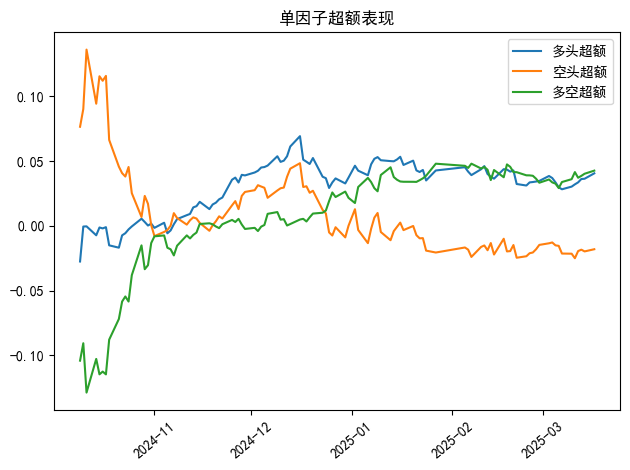

Âπ≥ÂùáÂçïËæπÊç¢ÊâãÔºö0.658
Âπ¥Âåñ‰∫§ÊòìÊàêÊú¨:0.005 (Êú™Âú®Ë∂ÖÈ¢ù‰∏≠Êâ£Èô§)


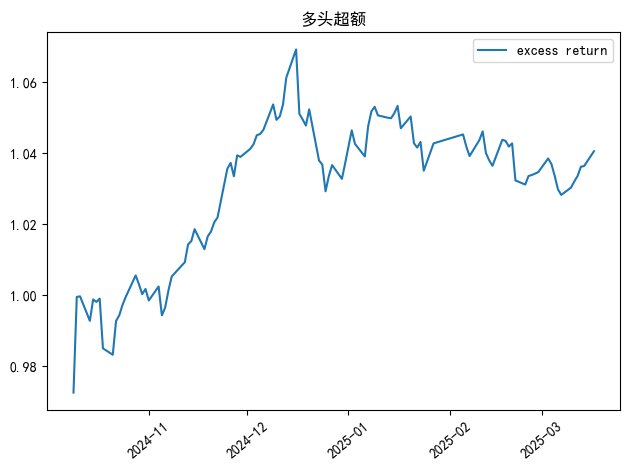

Rank IC: 3.56%
Rank ICIR: 1.08
tÂÄº: 2.66
Âπ¥ÂåñÊî∂ÁõäÁéá: 9.17%
Âπ¥ÂåñÊ≥¢Âä®Áéá: 9.05%
‰ø°ÊÅØÊØîÁéá: 1.01
ÊúÄÂ§ßÂõûÊí§: 3.78%


In [15]:
# ‰∏≠ÊÄßÂåñÂõ†Â≠êÂõûÊµã
pkg_path=r'C:\Users\ZHOU\Documents\2025CUHK\ÂÖ¥Èì∂\ÈúÄË¶ÅÊã∑ÁöÑÊï∞ÊçÆ\\'
import numpy as np
res = backtest_stand(
    -neutralized_factor,
    fre='month',
    stock_pool='888888',
    benchmark='b4',
    barra_neutral=True, # ‰∏≠ÊÄßÂåñ
    top=300,
    localdata_path=pkg_path+'packages/frdata',
    start='2024-09-31',
    end='2025-03-17'
)
# Rank IC
rank_ic = res['ic']['ic'].mean()
# Rank ICIR
rank_icir = res['ic']['ic'].mean() / res['ic']['ic'].std()
# tÂÄº
t_value = res['ic']['ic'].mean() / (res['ic']['ic'].std() / np.sqrt(res['ic']['ic'].count()))
perf = res['Â§öÁ©∫Ë°®Áé∞']['Â§öÂ§¥Ë°®Áé∞']  
annual_return = perf.loc['Âπ¥ÂåñË∂ÖÈ¢ù', 'mean']  # Âπ¥ÂåñÊî∂ÁõäÁéá
annual_vol = perf.loc['Ê≥¢Âä®Áéá', 'mean']      # Âπ¥ÂåñÊ≥¢Âä®Áéá
info_ratio = perf.loc['‰ø°ÊÅØÊØîÁéá', 'mean'] if '‰ø°ÊÅØÊØîÁéá' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['ËÉúÁéá', 'mean'] if 'ËÉúÁéá' in perf.index else perf.loc['Ê≠£ÊúàÊï∞', 'mean'] / perf.loc['ÊÄªÊúàÊï∞', 'mean']
max_drawdown = perf.loc['ÊúÄÂ§ßÂõûÊí§', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"tÂÄº: {t_value:.2f}")
print(f"Âπ¥ÂåñÊî∂ÁõäÁéá: {annual_return:.2%}")
print(f"Âπ¥ÂåñÊ≥¢Âä®Áéá: {annual_vol:.2%}")
print(f"‰ø°ÊÅØÊØîÁéá: {info_ratio:.2f}")
#print(f"ÊúàÂ∫¶ËÉúÁéá: {win_rate:.2%}")
print(f"ÊúÄÂ§ßÂõûÊí§: {max_drawdown:.2%}")

## 2.4 ‚ÄúÂæÖËëóËÄåÊïë‚ÄùÂõ†Â≠êÂú®‰∏çÂêåÊ†∑Êú¨Á©∫Èó¥‰∏ãÁöÑË°®Áé∞


‰∏çÂêåËÇ°Á•®Ê±†ÂõûÊµãÁªìÊûú

Ê≠£Âú®ÂõûÊµã Ê≤™Ê∑±300 (000300)...
load data locally from 2009-01-05 to 2025-04-15
Â§öÂ§¥Ë∂ÖÈ¢ù:
             2024    2025   mean
Âπ¥ÂåñË∂ÖÈ¢ù   0.1712 -0.0350 0.0681
Ê≥¢Âä®Áéá     0.0778  0.0507 0.0642
ÊúÄÂ§ßÂõûÊí§   0.0172  0.0152 0.0172
Â§èÊôÆÁéá     2.2003 -0.6913 1.0600
Êî∂ÁõäÂõûÊí§ÊØî 9.9664 -2.2973 3.9638
ÂçäÊ≥¢       0.0230  0.0142 0.0186
ÂçäÂ§èÊôÆ     7.4501 -2.4714 3.6654


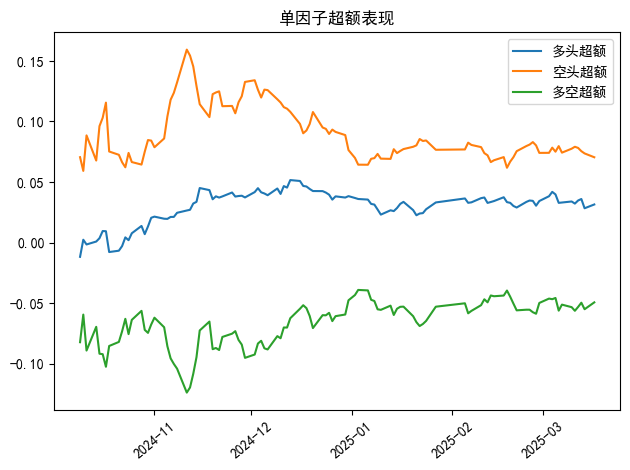

Âπ≥ÂùáÂçïËæπÊç¢ÊâãÔºö0.444
Âπ¥Âåñ‰∫§ÊòìÊàêÊú¨:0.003 (Êú™Âú®Ë∂ÖÈ¢ù‰∏≠Êâ£Èô§)


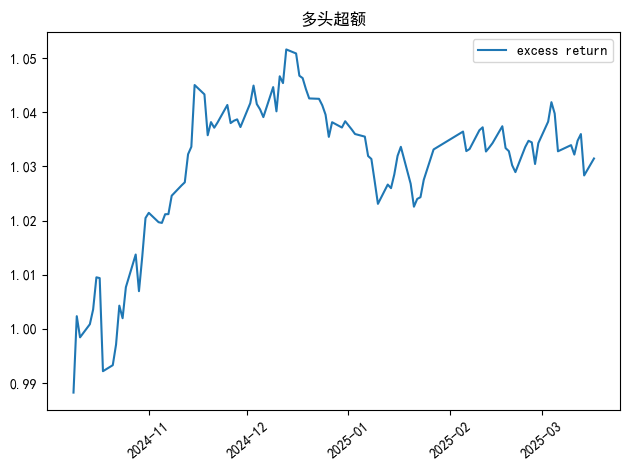

‚úÖ Ê≤™Ê∑±300 ÂõûÊµãÂÆåÊàê
   Âπ¥ÂåñË∂ÖÈ¢ùÊî∂Áõä: 6.81%
   ‰ø°ÊÅØÊØîÁéá: 1.06
   Rank IC: 0.045

Ê≠£Âú®ÂõûÊµã ‰∏≠ËØÅ500 (000905)...
load data locally from 2009-01-05 to 2025-04-15
Â§öÂ§¥Ë∂ÖÈ¢ù:
             2024    2025   mean
Âπ¥ÂåñË∂ÖÈ¢ù   0.1265 -0.1005 0.0130
Ê≥¢Âä®Áéá     0.0656  0.0576 0.0616
ÊúÄÂ§ßÂõûÊí§   0.0216  0.0390 0.0390
Â§èÊôÆÁéá     1.9276 -1.7446 0.2109
Êî∂ÁõäÂõûÊí§ÊØî 5.8443 -2.5736 0.3328
ÂçäÊ≥¢       0.0175  0.0158 0.0166
ÂçäÂ§èÊôÆ     7.2090 -6.3788 0.7806


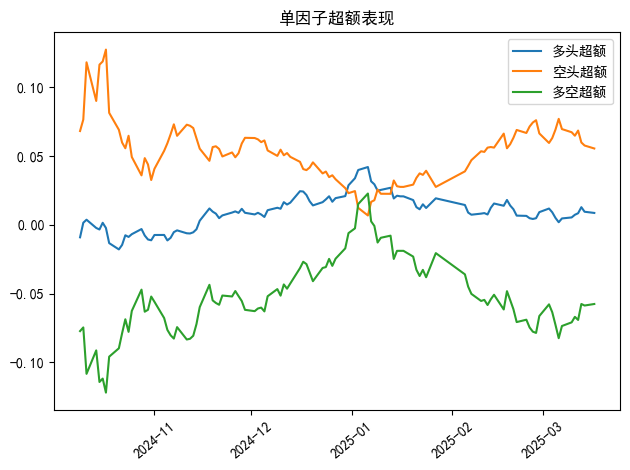

Âπ≥ÂùáÂçïËæπÊç¢ÊâãÔºö0.396
Âπ¥Âåñ‰∫§ÊòìÊàêÊú¨:0.003 (Êú™Âú®Ë∂ÖÈ¢ù‰∏≠Êâ£Èô§)


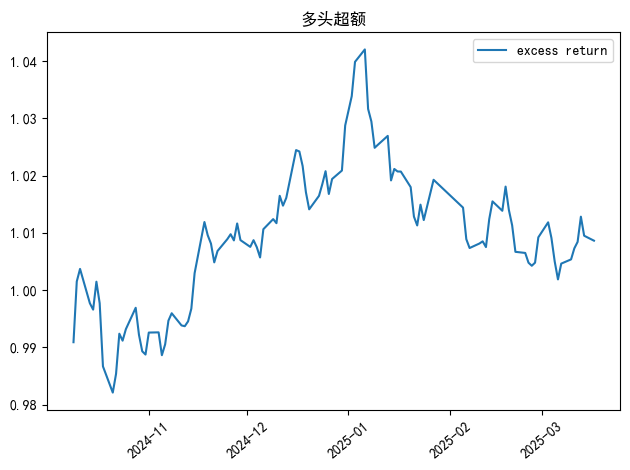

‚úÖ ‰∏≠ËØÅ500 ÂõûÊµãÂÆåÊàê
   Âπ¥ÂåñË∂ÖÈ¢ùÊî∂Áõä: 1.30%
   ‰ø°ÊÅØÊØîÁéá: 0.21
   Rank IC: 0.053

Ê≠£Âú®ÂõûÊµã ‰∏≠ËØÅ1000 (1000)...
load data locally from 2009-01-05 to 2025-04-15
Â§öÂ§¥Ë∂ÖÈ¢ù:
             2024    2025    mean
Âπ¥ÂåñË∂ÖÈ¢ù   0.1239 -0.1561 -0.0161
Ê≥¢Âä®Áéá     0.0907  0.0821  0.0864
ÊúÄÂ§ßÂõûÊí§   0.0436  0.0610  0.0610
Â§èÊôÆÁéá     1.3664 -1.9024 -0.1861
Êî∂ÁõäÂõûÊí§ÊØî 2.8417 -2.5580 -0.2635
ÂçäÊ≥¢       0.0260  0.0225  0.0243
ÂçäÂ§èÊôÆ     4.7612 -6.9464 -0.6629


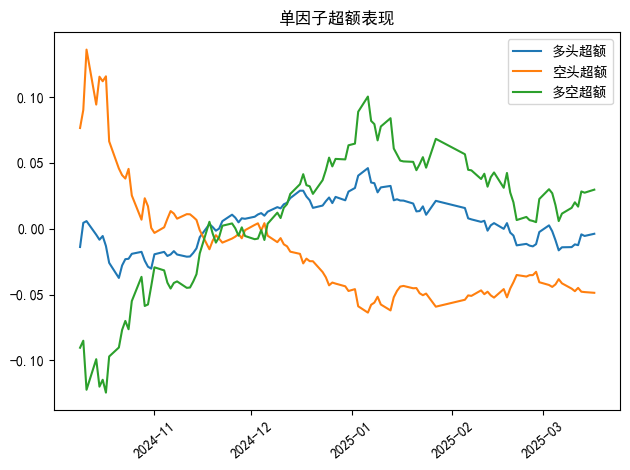

Âπ≥ÂùáÂçïËæπÊç¢ÊâãÔºö0.489
Âπ¥Âåñ‰∫§ÊòìÊàêÊú¨:0.004 (Êú™Âú®Ë∂ÖÈ¢ù‰∏≠Êâ£Èô§)


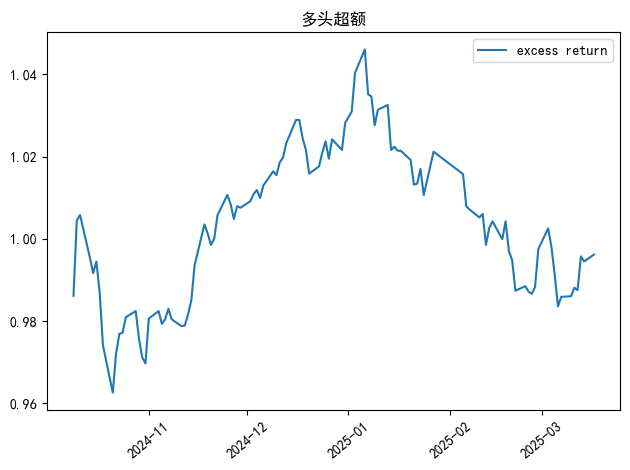

‚úÖ ‰∏≠ËØÅ1000 ÂõûÊµãÂÆåÊàê
   Âπ¥ÂåñË∂ÖÈ¢ùÊî∂Áõä: -1.61%
   ‰ø°ÊÅØÊØîÁéá: -0.19
   Rank IC: 0.058

Ê≠£Âú®ÂõûÊµã ÂÖ®AËÇ° (888888)...
load data locally from 2009-01-05 to 2025-04-15
Â§öÂ§¥Ë∂ÖÈ¢ù:
              2024    2025    mean
Âπ¥ÂåñË∂ÖÈ¢ù    0.5862  0.2169  0.4015
Ê≥¢Âä®Áéá      0.1408  0.0643  0.1025
ÊúÄÂ§ßÂõûÊí§    0.0470  0.0112  0.0470
Â§èÊôÆÁéá      4.1637  3.3741  3.9162
Êî∂ÁõäÂõûÊí§ÊØî 12.4600 19.4029  8.5348
ÂçäÊ≥¢        0.0445  0.0140  0.0293
ÂçäÂ§èÊôÆ     13.1635 15.4800 13.7179


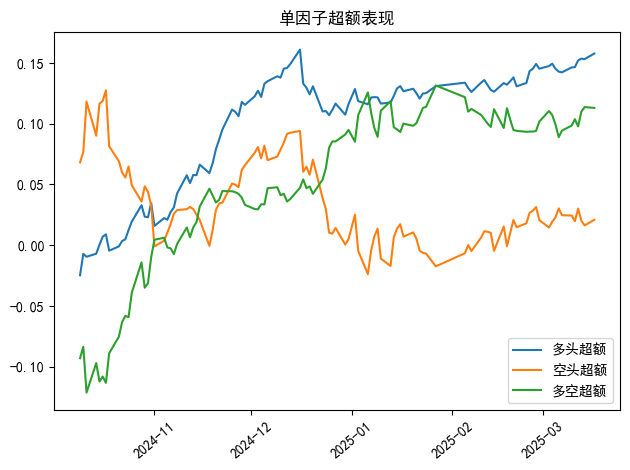

Âπ≥ÂùáÂçïËæπÊç¢ÊâãÔºö0.639
Âπ¥Âåñ‰∫§ÊòìÊàêÊú¨:0.005 (Êú™Âú®Ë∂ÖÈ¢ù‰∏≠Êâ£Èô§)


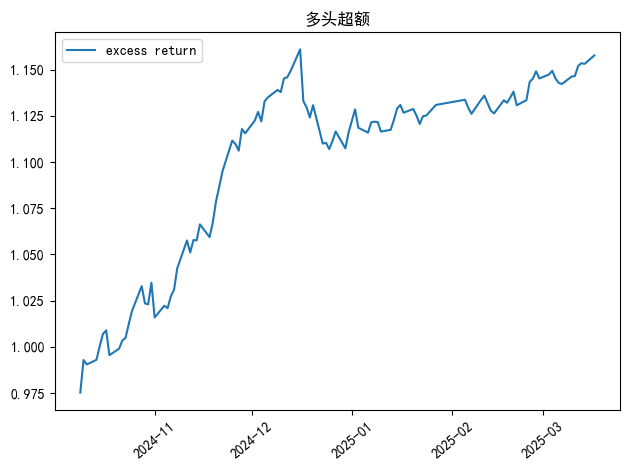

‚úÖ ÂÖ®AËÇ° ÂõûÊµãÂÆåÊàê
   Âπ¥ÂåñË∂ÖÈ¢ùÊî∂Áõä: 40.15%
   ‰ø°ÊÅØÊØîÁéá: 3.92
   Rank IC: 0.068

ÂõûÊµãÁªìÊûúÊ±áÊÄª
     ËÇ°Á•®Ê±†    ‰ª£Á†Å  Âπ¥ÂåñË∂ÖÈ¢ùÊî∂Áõä  Âπ¥ÂåñÊ≥¢Âä®Áéá  ‰ø°ÊÅØÊØîÁéá  ÊúÄÂ§ßÂõûÊí§  Rank IC  \
0   Ê≤™Ê∑±300  000300        0.0681      0.0642    1.0600    0.0172   0.0446   
1   ‰∏≠ËØÅ500  000905        0.0130      0.0616    0.2109    0.0390   0.0526   
2  ‰∏≠ËØÅ1000    1000       -0.0161      0.0864   -0.1861    0.0610   0.0584   
3     ÂÖ®AËÇ°  888888        0.4015      0.1025    3.9162    0.0470   0.0680   

    ICIR  
0 0.3699  
1 0.3815  
2 0.5818  
3 0.9404  


In [29]:
# ‰∏çÂêåËÇ°Á•®Ê±†ÂõûÊµã‰ª£Á†Å
import pandas as pd
import numpy as np

# ÊåáÊï∞Ê±†‰∏ébenchmark„ÄÅtopÁöÑÂØπÂ∫îÂÖ≥Á≥ª
pool_benchmark_top_map = {
    '000300': {'benchmark': 'b1', 'top': 100},   # Ê≤™Ê∑±300
    '000905': {'benchmark': 'b2', 'top': 300},   # ‰∏≠ËØÅ500
    '1000':   {'benchmark': 'b4', 'top': 300},   # ‰∏≠ËØÅ1000
    '1800':   {'benchmark': 'b3', 'top': 500},   # 800+1000
    '2000':   {'benchmark': 'b6', 'top': 500},   # ÂõΩËØÅ2000
    '888888': {'benchmark': 'b2', 'top': 300},   # ÂÖ®AÔºåÈªòËÆ§
}

def get_benchmark_and_top(pool_code):
    """Ëé∑ÂèñÂØπÂ∫îÁöÑÂü∫ÂáÜÂíåÈÄâËÇ°Êï∞Èáè"""
    if pool_code.startswith('TOP'):
        return 'b2', int(pool_code[3:]) 
    if pool_code.startswith('TPCT'):
        return 'b2', None               
    return (
        pool_benchmark_top_map.get(pool_code, {'benchmark': 'b2', 'top': 300})['benchmark'],
        pool_benchmark_top_map.get(pool_code, {'benchmark': 'b2', 'top': 300})['top']
    )

# ÂõûÊµãÂèÇÊï∞ËÆæÁΩÆ
start_date = '2024-10-01'  
end_date = '2025-03-17'

# ËÇ°Á•®Ê±†ÈÖçÁΩÆ
pools_config = [
    ('000300', 'Ê≤™Ê∑±300'),
    ('000905', '‰∏≠ËØÅ500'), 
    ('1000', '‰∏≠ËØÅ1000'),
    ('888888', 'ÂÖ®AËÇ°')  # Ê∑ªÂä†ÂÖ®A‰Ωú‰∏∫ÂØπÊØî
]


results = []  
detailed_results = []  

print("="*60)
print("‰∏çÂêåËÇ°Á•®Ê±†ÂõûÊµãÁªìÊûú")
print("="*60)

for pool_code, pool_name in pools_config:
    print(f"\nÊ≠£Âú®ÂõûÊµã {pool_name} ({pool_code})...")
    
    # Ëé∑ÂèñÂØπÂ∫îÁöÑÂü∫ÂáÜÂíåÈÄâËÇ°Êï∞Èáè
    benchmark, top = get_benchmark_and_top(pool_code)
    
    # ÊâßË°åÂõûÊµã
    res = backtest_stand(
        -final_factor, 
        start=start_date,
        end=end_date,
        benchmark=benchmark,
        stock_pool=pool_code,
        barra_neutral=True,
        fre='month',
        top=top,
        localdata_path=pkg_path+'packages/frdata'
    )
    
    # ÊèêÂèñÂÖ≥ÈîÆÊåáÊ†á
    performance_metrics = {
        'ËÇ°Á•®Ê±†': pool_name,  # Ê∑ªÂä†ËÇ°Á•®Ê±†ÂêçÁß∞
        '‰ª£Á†Å': pool_code,    # Ê∑ªÂä†‰ª£Á†Å
        'Âπ¥ÂåñË∂ÖÈ¢ùÊî∂Áõä': res['Â§öÁ©∫Ë°®Áé∞']['Â§öÂ§¥Ë°®Áé∞'].loc['Âπ¥ÂåñË∂ÖÈ¢ù', 'mean'],
        'Âπ¥ÂåñÊ≥¢Âä®Áéá': res['Â§öÁ©∫Ë°®Áé∞']['Â§öÂ§¥Ë°®Áé∞'].loc['Ê≥¢Âä®Áéá', 'mean'],
        '‰ø°ÊÅØÊØîÁéá': res['Â§öÁ©∫Ë°®Áé∞']['Â§öÂ§¥Ë°®Áé∞'].loc['Âπ¥ÂåñË∂ÖÈ¢ù', 'mean'] / res['Â§öÁ©∫Ë°®Áé∞']['Â§öÂ§¥Ë°®Áé∞'].loc['Ê≥¢Âä®Áéá', 'mean'],
        'ÊúÄÂ§ßÂõûÊí§': res['Â§öÁ©∫Ë°®Áé∞']['Â§öÂ§¥Ë°®Áé∞'].loc['ÊúÄÂ§ßÂõûÊí§', 'mean'],
        'Rank IC': res['ic']['ic'].mean(),
        'ICIR': res['ic']['ic'].mean() / res['ic']['ic'].std()
    }
    
    # Â≠òÂÇ®ÁªìÊûú - Êîπ‰∏∫appendÂà∞list
    results.append(performance_metrics)
    detailed_results.append((pool_name, res))  # Â≠òÂÇ®‰∏∫tuple
    
    # ÊâìÂç∞ÁªìÊûú
    print(f"{pool_name} ÂõûÊµãÂÆåÊàê")
    print(f"   Âπ¥ÂåñË∂ÖÈ¢ùÊî∂Áõä: {performance_metrics['Âπ¥ÂåñË∂ÖÈ¢ùÊî∂Áõä']:.2%}")
    print(f"   ‰ø°ÊÅØÊØîÁéá: {performance_metrics['‰ø°ÊÅØÊØîÁéá']:.2f}")
    print(f"   Rank IC: {performance_metrics['Rank IC']:.3f}")

# Â∞ÜresultsËΩ¨Êç¢‰∏∫DataFrame‰æø‰∫éÊü•Áúã
results_df = pd.DataFrame(results)
print("\n" + "="*60)
print("ÂõûÊµãÁªìÊûúÊ±áÊÄª")
print("="*60)
print(results_df)

In [121]:
final_factor

stock_code  000001  000002  000004  000006  000007  000008  000009  000010  \
_id                                                                          
2024-09-30  1.4379  1.6077  2.1198  1.8163  1.3150  1.0713  1.7365  1.2122   
2024-10-31  1.5802  1.9565  2.5582  2.0468  1.2518  1.2109  1.5252  1.4040   
2024-11-29  1.6090  1.6911  2.1822  2.4815  2.0213  1.3575  1.6042  1.6915   
2024-12-31  1.6063  1.6672  1.8802  1.7060  1.5383  2.0421  1.2915  1.8066   
2025-01-27  1.5602  1.4474  1.6377  2.0194  1.1968  1.3053  1.3202  1.4107   
2025-02-28  1.4544  1.7946  1.6411  1.4132  1.2845  1.9455  1.6778  1.1241   

stock_code  000011  000012  000014  000016  000017  000019  000020  000021  \
_id                                                                          
2024-09-30  1.9116  1.2038  1.7025  3.4078  1.3285  1.4215  2.6913  1.5774   
2024-10-31  1.8197  1.3828  1.8767  1.7903  1.3819  1.4529  1.8832  2.1787   
2024-11-29  1.5106  2.1476  1.6908  2.6100  1.7551  1.3101  1.3923  2.1800   
2024-12-31  1.6080  1.1388  1.3954  2.2556  1.6402  1.2934  1.4855  1.6978   
2025-01-27  1.2544  1.0761  1.5317  2.2273  1.4581  1.2251  1.3872  1.7221   
2025-02-28  1.4141  1.0337  1.3004  2.1537  1.2530  1.1307  1.3586  1.8301   

stock_code  000025  000026  000027  000028  ...  688758  688766  688767  \
_id                                         ...                           
2024-09-30  2.9531  1.2558  1.3159  1.5875  ...     nan  1.7068  1.1295   
2024-10-31  2.7368  1.6133  1.6162  1.4988  ...     nan  1.6351  1.0623   
2024-11-29  1.6623  1.4061  1.2938  1.3660  ...     nan  1.6596  1.4559   
2024-12-31  1.5074  1.4511  1.1786  1.3351  ...     nan  1.9157  1.3628   
2025-01-27  1.3004  1.3694  1.1771  1.3405  ...  2.0657  1.8861  1.3368   
2025-02-28  1.9185  1.5985  1.0999  1.2905  ...  1.4749  1.6695  1.3115   

stock_code  688768  688772  688776  688777  688778  688779  688786  688787  \
_id                                                                          
2024-09-30  1.2875  1.3845  1.4265  1.7847  1.6548  1.6202  1.1685  1.4055   
2024-10-31  1.2973  1.7320  1.3454  1.8791  1.5890  1.7175  1.1646  1.7491   
2024-11-29  1.4463  1.4201  1.4038  1.8022  1.7463  1.7013  1.3596  1.7602   
2024-12-31  1.4751  1.5099  1.4144  1.9525  1.7286  1.3674  1.2487  2.0709   
2025-01-27  1.4370  1.3760  1.5525  1.6273  1.5539  1.2489  1.3543  2.0570   
2025-02-28  1.4396  1.4737  1.5992  1.8951  1.9032  1.3111  1.3070  1.9485   

stock_code  688788  688789  688793  688798  688799  688800  688819  688981  \
_id                                                                          
2024-09-30  1.4413  1.5349  1.3152  1.3858  1.1733  1.3325  1.5208  1.7829   
2024-10-31  1.1855  1.4906  1.5791  1.5044  1.4878  1.6714  1.4909  6.3311   
2024-11-29  1.3154  1.4280  1.2150  1.8235  1.3259  1.8150  1.4285  2.4956   
2024-12-31  1.2855  1.3344  2.0820  1.7350  1.2878  1.7967  1.3014  1.9232   
2025-01-27  1.1740  1.5020  1.2885  1.5616  1.1239  1.9401  1.2587  1.9391   
2025-02-28  1.4550  1.4750  1.3497  1.7341  1.1361  1.7331  1.4412  1.8026   

stock_code  689009  
_id                 
2024-09-30  1.8856  
2024-10-31  1.6979  
2024-11-29  1.6476  
2024-12-31  1.8425  
2025-01-27  1.9140  
2025-02-28  1.7514  

[6 rows x 5143 columns]

‚úÖ Ê≤™Ê∑±300 ÊúÄÁªàÁ¥ØËÆ°Êî∂Áõä: 0.95
‚úÖ ‰∏≠ËØÅ500 ÊúÄÁªàÁ¥ØËÆ°Êî∂Áõä: 0.94
‚úÖ ‰∏≠ËØÅ1000 ÊúÄÁªàÁ¥ØËÆ°Êî∂Áõä: 1.03
‚úÖ ÂÖ®AËÇ° ÊúÄÁªàÁ¥ØËÆ°Êî∂Áõä: 1.11


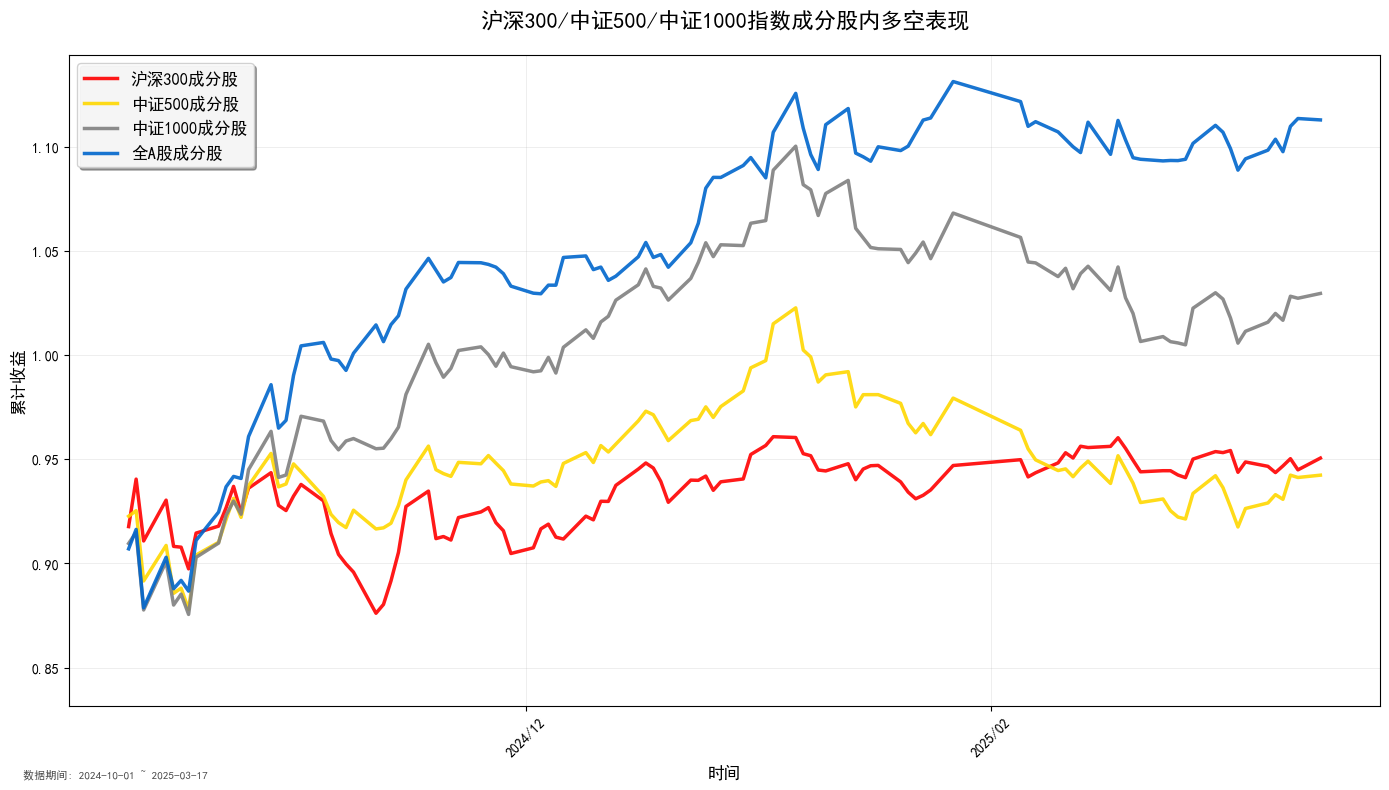

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

def plot_portfolio_comparison(detailed_results_list, start_date, end_date):
    """ÁªòÂà∂‰∏çÂêåËÇ°Á•®Ê±†ÁöÑÂ§öÁ©∫Ë°®Áé∞ÂØπÊØîÂõæ - ÈÄÇÈÖçlistÊ†ºÂºèÔºå‰øÆÂ§çÊó∂Èó¥Á¥¢ÂºïÈóÆÈ¢ò"""
    
    # ÂàõÂª∫ÂõæË°®
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # ÂÆö‰πâÈ¢úËâ≤ÂíåÊ†∑Âºè
    colors = {
        'Ê≤™Ê∑±300': '#FF0000',    # Á∫¢Ëâ≤
        '‰∏≠ËØÅ500': '#FFD700',    # ÈáëÈªÑËâ≤  
        '‰∏≠ËØÅ1000': '#808080',   # ÁÅ∞Ëâ≤
        'ÂÖ®AËÇ°': '#0066CC'       # ËìùËâ≤ÔºåÂ¶ÇÊûúÈúÄË¶ÅÁöÑËØù
    }
    
    line_width = 2.5
    
    # ÁªòÂà∂ÊØè‰∏™ËÇ°Á•®Ê±†ÁöÑÁ¥ØËÆ°Êî∂ÁõäÊõ≤Á∫ø
    for pool_name, res in detailed_results_list:  # Áõ¥Êé•ÈÅçÂéÜlist of tuples
        if pool_name in colors:  # Âè™ÁªòÂà∂ÊåáÂÆöÁöÑÊåáÊï∞
            try:
                # Ëé∑ÂèñÂ§öÁ©∫Ë∂ÖÈ¢ùÊî∂ÁõäÂ∫èÂàó
                longshort_returns = res['Â§öÁ©∫Êî∂Áõä']['Â§öÁ©∫Ë∂ÖÈ¢ù']

            
                # ËΩ¨Êç¢‰∏∫Á¥ØËÆ°Êî∂ÁõäÔºà‰ªé1ÂºÄÂßãÔºâ
                cumulative_returns = (1 + longshort_returns).cumprod()
                
                #print(f"   Á¥ØËÆ°Êî∂ÁõäËåÉÂõ¥: {cumulative_returns.min():.3f} ~ {cumulative_returns.max():.3f}")
                
                # ÁªòÂà∂Á∫øÊù°
                ax.plot(
                    cumulative_returns.index, 
                    cumulative_returns.values,
                    color=colors[pool_name],
                    linewidth=line_width,
                    label=f'{pool_name}ÊàêÂàÜËÇ°',
                    alpha=0.9
                )
                
                print(f"{pool_name} ÊúÄÁªàÁ¥ØËÆ°Êî∂Áõä: {cumulative_returns.iloc[-1]:.2f}")
                
            except Exception as e:
                print(f"{pool_name} ÁªòÂà∂Â§±Ë¥•: {e}")
                import traceback
                traceback.print_exc()
    
    # ËÆæÁΩÆÂõæË°®Ê†∑Âºè
    ax.set_title('Ê≤™Ê∑±300/‰∏≠ËØÅ500/‰∏≠ËØÅ1000ÊåáÊï∞ÊàêÂàÜËÇ°ÂÜÖÂ§öÁ©∫Ë°®Áé∞', 
                fontsize=16, fontweight='bold', pad=20)
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥
    ax.set_xlabel('Êó∂Èó¥', fontsize=12)
    ax.set_ylabel('Á¥ØËÆ°Êî∂Áõä', fontsize=12)
    
    # ËÆæÁΩÆÁΩëÊ†º
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
    # ËÆæÁΩÆÂõæ‰æã
    legend = ax.legend(
        loc='upper left',
        fontsize=12,
        frameon=True,
        fancybox=True,
        shadow=True,
        framealpha=0.9
    )
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥Ê†ºÂºè
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Ê†ºÂºèÂåñxËΩ¥Êó•ÊúüÊòæÁ§∫ - Âè™ÊúâÂú®ÊúâÊúâÊïàÊï∞ÊçÆÊó∂ÊâçËÆæÁΩÆ
    if len(ax.get_lines()) > 0:  # Á°Æ‰øùÊúâÁªòÂà∂ÁöÑÁ∫øÊù°
        try:
            # ËÆæÁΩÆÊó•ÊúüÊ†ºÂºè
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # ÊØè2‰∏™ÊúàÊòæÁ§∫‰∏ÄÊ¨°
            ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))
            
            # ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ
            plt.xticks(rotation=45)
            
            #print("Êó∂Èó¥ËΩ¥Ê†ºÂºèËÆæÁΩÆÂÆåÊàê")
            
        except Exception as e:
            print(f"Êó∂Èó¥ËΩ¥ËÆæÁΩÆÂ§±Ë¥•: {e}")
    
    # ËÆæÁΩÆyËΩ¥‰ªéÂêàÈÄÇÁöÑ‰ΩçÁΩÆÂºÄÂßã
    try:
        y_min = min([min((1 + res['Â§öÁ©∫Êî∂Áõä']['Â§öÁ©∫Ë∂ÖÈ¢ù']).cumprod()) 
                    for pool_name, res in detailed_results_list 
                    if pool_name in colors])
        ax.set_ylim(bottom=max(0, y_min * 0.95))
    except:
        print("yËΩ¥ËåÉÂõ¥ËÆæÁΩÆÂ§±Ë¥•Ôºå‰ΩøÁî®ÈªòËÆ§ËÆæÁΩÆ")
    
    # Ë∞ÉÊï¥Â∏ÉÂ±Ä
    plt.tight_layout()
    
    # Ê∑ªÂä†Êï∞ÊçÆÊ∫êÊ≥®Èáä
    plt.figtext(0.02, 0.02, f'Êï∞ÊçÆÊúüÈó¥: {start_date} ~ {end_date}',
                fontsize=8, style='italic', alpha=0.7)
    
    # ÊòæÁ§∫ÂõæË°®
    plt.show()
    


# Ë∞ÉÁî®ÁªòÂõæÂáΩÊï∞
plot_portfolio_comparison(detailed_results, start_date, end_date) 

‚úÖ Ê≤™Ê∑±300 ÊúÄÁªàÁ¥ØËÆ°Êî∂Áõä: 1.03
‚úÖ ‰∏≠ËØÅ500 ÊúÄÁªàÁ¥ØËÆ°Êî∂Áõä: 1.01
‚úÖ ‰∏≠ËØÅ1000 ÊúÄÁªàÁ¥ØËÆ°Êî∂Áõä: 1.00
‚úÖ ÂÖ®AËÇ° ÊúÄÁªàÁ¥ØËÆ°Êî∂Áõä: 1.16


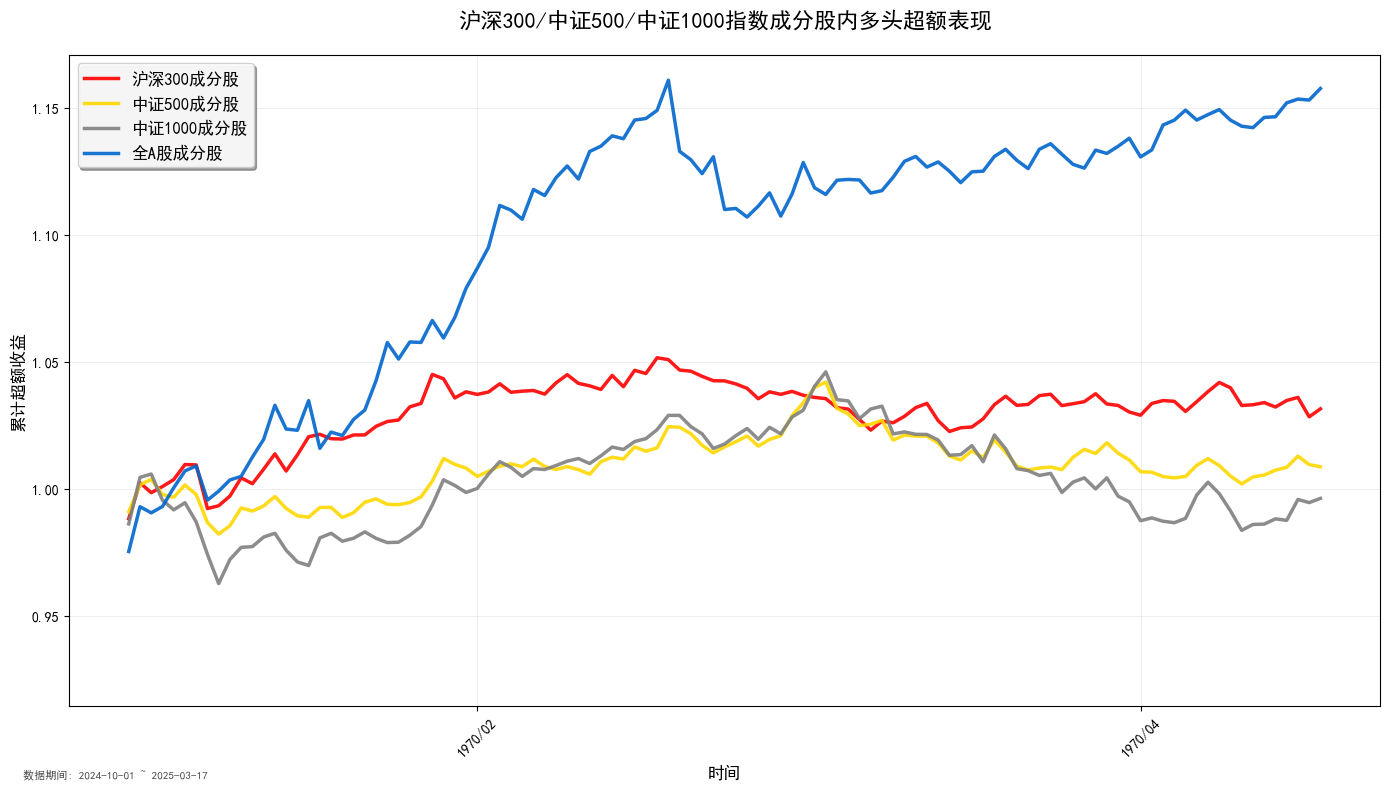

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

def plot_portfolio_comparison(detailed_results_list, start_date, end_date):
    """ÁªòÂà∂‰∏çÂêåËÇ°Á•®Ê±†ÁöÑÂ§öÁ©∫Ë°®Áé∞ÂØπÊØîÂõæ - ÈÄÇÈÖçlistÊ†ºÂºèÔºå‰øÆÂ§çÊó∂Èó¥Á¥¢ÂºïÈóÆÈ¢ò"""
    
    # ÂàõÂª∫ÂõæË°®
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # ÂÆö‰πâÈ¢úËâ≤ÂíåÊ†∑Âºè
    colors = {
        'Ê≤™Ê∑±300': '#FF0000',    # Á∫¢Ëâ≤
        '‰∏≠ËØÅ500': '#FFD700',    # ÈáëÈªÑËâ≤  
        '‰∏≠ËØÅ1000': '#808080',   # ÁÅ∞Ëâ≤
        'ÂÖ®AËÇ°': '#0066CC'       # ËìùËâ≤ÔºåÂ¶ÇÊûúÈúÄË¶ÅÁöÑËØù
    }
    
    line_width = 2.5
    
    # ÁªòÂà∂ÊØè‰∏™ËÇ°Á•®Ê±†ÁöÑÁ¥ØËÆ°Êî∂ÁõäÊõ≤Á∫ø
    for pool_name, res in detailed_results_list:  # Áõ¥Êé•ÈÅçÂéÜlist of tuples
        if pool_name in colors:  # Âè™ÁªòÂà∂ÊåáÂÆöÁöÑÊåáÊï∞
            try:
                # Ëé∑ÂèñÂ§öÁ©∫Ë∂ÖÈ¢ùÊî∂ÁõäÂ∫èÂàó
                longshort_returns = res['Â§öÁ©∫Êî∂Áõä']['Â§öÂ§¥Ë∂ÖÈ¢ù']

            
                # ËΩ¨Êç¢‰∏∫Á¥ØËÆ°Êî∂ÁõäÔºà‰ªé1ÂºÄÂßãÔºâ
                cumulative_returns = (1 + longshort_returns).cumprod()
                
                #print(f"   Á¥ØËÆ°Êî∂ÁõäËåÉÂõ¥: {cumulative_returns.min():.3f} ~ {cumulative_returns.max():.3f}")
                
                # ÁªòÂà∂Á∫øÊù°
                ax.plot(
                    cumulative_returns.index, 
                    cumulative_returns.values,
                    color=colors[pool_name],
                    linewidth=line_width,
                    label=f'{pool_name}ÊàêÂàÜËÇ°',
                    alpha=0.9
                )
                
                print(f"{pool_name} ÊúÄÁªàÁ¥ØËÆ°Êî∂Áõä: {cumulative_returns.iloc[-1]:.2f}")
                
            except Exception as e:
                print(f"{pool_name} ÁªòÂà∂Â§±Ë¥•: {e}")
                import traceback
                traceback.print_exc()
    
    # ËÆæÁΩÆÂõæË°®Ê†∑Âºè
    ax.set_title('Ê≤™Ê∑±300/‰∏≠ËØÅ500/‰∏≠ËØÅ1000ÊåáÊï∞ÊàêÂàÜËÇ°ÂÜÖÂ§öÂ§¥Ë∂ÖÈ¢ùË°®Áé∞', 
                fontsize=16, fontweight='bold', pad=20)
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥
    ax.set_xlabel('Êó∂Èó¥', fontsize=12)
    ax.set_ylabel('Á¥ØËÆ°Ë∂ÖÈ¢ùÊî∂Áõä', fontsize=12)
    
    # ËÆæÁΩÆÁΩëÊ†º
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
    # ËÆæÁΩÆÂõæ‰æã
    legend = ax.legend(
        loc='upper left',
        fontsize=12,
        frameon=True,
        fancybox=True,
        shadow=True,
        framealpha=0.9
    )
    
    # ËÆæÁΩÆÂùêÊ†áËΩ¥Ê†ºÂºè
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Ê†ºÂºèÂåñxËΩ¥Êó•ÊúüÊòæÁ§∫ - Âè™ÊúâÂú®ÊúâÊúâÊïàÊï∞ÊçÆÊó∂ÊâçËÆæÁΩÆ
    if len(ax.get_lines()) > 0:  # Á°Æ‰øùÊúâÁªòÂà∂ÁöÑÁ∫øÊù°
        try:
            # ËÆæÁΩÆÊó•ÊúüÊ†ºÂºè
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # ÊØè2‰∏™ÊúàÊòæÁ§∫‰∏ÄÊ¨°
            ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))
            
            # ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ
            plt.xticks(rotation=45)
            
            #print("Êó∂Èó¥ËΩ¥Ê†ºÂºèËÆæÁΩÆÂÆåÊàê")
            
        except Exception as e:
            print(f"Êó∂Èó¥ËΩ¥ËÆæÁΩÆÂ§±Ë¥•: {e}")
    
    # ËÆæÁΩÆyËΩ¥‰ªéÂêàÈÄÇÁöÑ‰ΩçÁΩÆÂºÄÂßã
    try:
        y_min = min([min((1 + res['Â§öÁ©∫Êî∂Áõä']['Â§öÂ§¥Ë∂ÖÈ¢ù']).cumprod()) 
                    for pool_name, res in detailed_results_list 
                    if pool_name in colors])
        ax.set_ylim(bottom=max(0, y_min * 0.95))
    except:
        print("yËΩ¥ËåÉÂõ¥ËÆæÁΩÆÂ§±Ë¥•Ôºå‰ΩøÁî®ÈªòËÆ§ËÆæÁΩÆ")
    
    # Ë∞ÉÊï¥Â∏ÉÂ±Ä
    plt.tight_layout()
    
    # Ê∑ªÂä†Êï∞ÊçÆÊ∫êÊ≥®Èáä
    plt.figtext(0.02, 0.02, f'Êï∞ÊçÆÊúüÈó¥: {start_date} ~ {end_date}',
                fontsize=8, style='italic', alpha=0.7)
    
    # ÊòæÁ§∫ÂõæË°®
    plt.show()
    


# Ë∞ÉÁî®ÁªòÂõæÂáΩÊï∞
plot_portfolio_comparison(detailed_results, start_date, end_date) 

## 2.5 ÊåáÊï∞Â¢ûÂº∫

### - ÂçïÂ§©ÊåáÊï∞Â¢ûÂº∫

In [8]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("üöÄ ÂºÄÂßãÊåáÊï∞Â¢ûÂº∫ÂàÜÊûê")

# =============================================================================
# Á¨¨1Ê≠•ÔºöÂáÜÂ§áÊï∞ÊçÆ
# =============================================================================
print("\nÁ¨¨1Ê≠•ÔºöÂáÜÂ§áÊï∞ÊçÆ")

# Á°Æ‰øùfinal_factorÂ≠òÂú®
if 'final_factor' not in globals():
    print("Êú™ÊâæÂà∞final_factorÔºåËØ∑ÂÖàÊûÑÂª∫Âõ†Â≠ê")
else:
    print(f"final_factorÊï∞ÊçÆ: {final_factor.shape}")
    print(f"   Êó∂Èó¥ËåÉÂõ¥: {final_factor.index[0]} ~ {final_factor.index[-1]}")

# Ëé∑ÂèñÊúÄËøëÂèØÁî®ÁöÑÊó•Êúü
factor_date = final_factor.index[-1]  # ‰ΩøÁî®ÊúÄÊñ∞ÁöÑÂõ†Â≠êÊï∞ÊçÆ
print(f"‰ΩøÁî®Âõ†Â≠êÊï∞ÊçÆÊó•Êúü: {factor_date}")

# Ëé∑ÂèñÂõ†Â≠êÂæóÂàÜ
factor_scores = final_factor.loc[factor_date].dropna()
print(f"ÊúâÊïàËÇ°Á•®Êï∞Èáè: {len(factor_scores)}")

üöÄ ÂºÄÂßãÊåáÊï∞Â¢ûÂº∫ÂàÜÊûê

Á¨¨1Ê≠•ÔºöÂáÜÂ§áÊï∞ÊçÆ
final_factorÊï∞ÊçÆ: (6, 5143)
   Êó∂Èó¥ËåÉÂõ¥: 2024-09-30 ~ 2025-02-28
‰ΩøÁî®Âõ†Â≠êÊï∞ÊçÆÊó•Êúü: 2025-02-28
ÊúâÊïàËÇ°Á•®Êï∞Èáè: 5130


In [9]:
# =============================================================================
# Á¨¨2Ê≠•ÔºöËé∑ÂèñÊåáÊï∞ÊàêÂàÜËÇ°ÊùÉÈáç
# =============================================================================
print("\nÁ¨¨2Ê≠•ÔºöËé∑ÂèñÊåáÊï∞ÊùÉÈáç")

# ËØªÂèñÊåáÊï∞ÊàêÂàÜ
with open(r'C:\Users\ZHOU\Documents\2025CUHK\ÂÖ¥Èì∂\ÈúÄË¶ÅÊã∑ÁöÑÊï∞ÊçÆ\packages\frdata\index_dict.pkl', 'rb') as f:
    index_dict = pickle.load(f)  # dict

# ÊâæÂà∞ÊúÄËøëÁöÑÊåáÊï∞ÊùÉÈáçÊï∞ÊçÆ
available_index_dates = [d for d in index_dict['index']['_id'] if d <= factor_date]
index_date = max(available_index_dates)
print(f"‰ΩøÁî®ÊåáÊï∞ÊùÉÈáçÊó•Êúü: {index_date}")

# Ëé∑ÂèñÂØπÂ∫îÊó•ÊúüÁöÑÊùÉÈáçÊï∞ÊçÆ
# ÊâæÂà∞ËØ•Êó•ÊúüÂú®DataFrame‰∏≠ÁöÑË°å
date_mask = index_dict['index']['_id'] == index_date
index_weights_data = index_dict['index'].loc[date_mask, 'indexComponentsWeight'].iloc[0]

print(f"ÂèØÁî®ÊåáÊï∞: {list(index_weights_data.keys())}")

# Ëé∑Âèñ‰∏âÂ§ßÊåáÊï∞ÁöÑÊàêÂàÜËÇ°ÊùÉÈáç
index_names = ['000300', '000905', '000852']  # Ê≤™Ê∑±300, ‰∏≠ËØÅ500, ‰∏≠ËØÅ1000
index_weights = {}

for idx_name in index_names:
    if idx_name in index_weights_data:  # Ê£ÄÊü•ÊåáÊï∞ÊòØÂê¶Â≠òÂú®‰∫éÊùÉÈáçÊï∞ÊçÆ‰∏≠
        weights_dict = index_weights_data[idx_name]  # Ëé∑ÂèñËØ•ÊåáÊï∞ÁöÑÊùÉÈáçÂ≠óÂÖ∏
        weights = pd.Series(weights_dict)  # ËΩ¨Êç¢‰∏∫Series
        weights = weights / weights.sum()  # ÂΩí‰∏ÄÂåñ
        index_weights[idx_name] = weights
        print(f"{idx_name} ÊàêÂàÜËÇ°Êï∞Èáè: {len(weights)}")
    else:
        print(f"{idx_name} ‰∏çÂ≠òÂú®‰∫éÊï∞ÊçÆ‰∏≠")


Á¨¨2Ê≠•ÔºöËé∑ÂèñÊåáÊï∞ÊùÉÈáç
‰ΩøÁî®ÊåáÊï∞ÊùÉÈáçÊó•Êúü: 2025-02-28
ÂèØÁî®ÊåáÊï∞: ['000300', '000905', '000906', '000852', '000016', '399303']
000300 ÊàêÂàÜËÇ°Êï∞Èáè: 300
000905 ÊàêÂàÜËÇ°Êï∞Èáè: 500
000852 ÊàêÂàÜËÇ°Êï∞Èáè: 1000


In [10]:
# =============================================================================
# Á¨¨3Ê≠•ÔºöËé∑ÂèñÈ£éÈô©Âõ†Â≠êÊï∞ÊçÆ
# =============================================================================
print("\nÁ¨¨3Ê≠•ÔºöÂáÜÂ§áÈ£éÈô©Êï∞ÊçÆ")
with open(r'C:\Users\ZHOU\Documents\2025CUHK\ÂÖ¥Èì∂\ÈúÄË¶ÅÊã∑ÁöÑÊï∞ÊçÆ\packages\frdata\barra_df_tl.pkl', 'rb') as f:
    barra_df_tl = pickle.load(f)  # dict
with open(r'C:\Users\ZHOU\Documents\2025CUHK\ÂÖ¥Èì∂\ÈúÄË¶ÅÊã∑ÁöÑÊï∞ÊçÆ\packages\frdata\stock_ind.pkl', 'rb') as f:
    stock_ind = pickle.load(f)  # dict
# Ëé∑ÂèñÊúÄËøëÁöÑBarraÊï∞ÊçÆ
barra_dates = [d for d in barra_df_tl.index if d <= factor_date]
barra_date = max(barra_dates)
barra_data = barra_df_tl.loc[barra_date]
print(f"‰ΩøÁî®BarraÊï∞ÊçÆÊó•Êúü: {barra_date}")

# Ëé∑ÂèñË°å‰∏öÊï∞ÊçÆ
industry_data = stock_ind.loc[factor_date]
print(f"Ë°å‰∏öÂàÜÁ±ªÊï∞ÊçÆ: {len(industry_data.dropna())}Âè™ËÇ°Á•®")


Á¨¨3Ê≠•ÔºöÂáÜÂ§áÈ£éÈô©Êï∞ÊçÆ
‰ΩøÁî®BarraÊï∞ÊçÆÊó•Êúü: 2025-02-28
Ë°å‰∏öÂàÜÁ±ªÊï∞ÊçÆ: 5383Âè™ËÇ°Á•®


In [107]:
# =============================================================================
# Á¨¨4Ê≠•ÔºöÊ£ÄÊü•Êï∞ÊçÆ‰∫§ÈõÜÈóÆÈ¢ò
# =============================================================================
print("\nüîç Á¨¨4Ê≠•ÔºödebugÊï∞ÊçÆ‰∫§ÈõÜ")

# ÂÖàÊ£ÄÊü•ÊØè‰∏™Êï∞ÊçÆÈõÜÁöÑËÇ°Á•®‰ª£Á†Å
print("ÂêÑÊï∞ÊçÆÈõÜËÇ°Á•®‰ª£Á†ÅÊï∞Èáè:")
print(f"factor_scores: {len(factor_scores)} Âè™ËÇ°Á•®")
print(f"  Á§∫‰æã: {list(factor_scores.index[:5])}")

for idx_name in index_names:
    if idx_name in index_weights:
        benchmark_w = index_weights[idx_name]
        print(f"{idx_name} Âü∫ÂáÜÊùÉÈáç: {len(benchmark_w)} Âè™ËÇ°Á•®") 
        print(f"  Á§∫‰æã: {list(benchmark_w.index[:5])}")

print(f"barra_data: {len(barra_data['BETA'])} Âè™ËÇ°Á•®")
print(f"  Á§∫‰æã: {list(barra_data['BETA'])[:5]}")

print(f"industry_data: {len(industry_data.dropna())} Âè™ËÇ°Á•®")
print(f"  Á§∫‰æã: {list(industry_data.dropna().index[:5])}")


üîç Á¨¨4Ê≠•ÔºödebugÊï∞ÊçÆ‰∫§ÈõÜ
üìä ÂêÑÊï∞ÊçÆÈõÜËÇ°Á•®‰ª£Á†ÅÊï∞Èáè:
factor_scores: 5130 Âè™ËÇ°Á•®
  Á§∫‰æã: ['000001', '000002', '000004', '000006', '000007']
000300 Âü∫ÂáÜÊùÉÈáç: 300 Âè™ËÇ°Á•®
  Á§∫‰æã: ['000001', '000002', '000063', '000100', '000157']
000905 Âü∫ÂáÜÊùÉÈáç: 500 Âè™ËÇ°Á•®
  Á§∫‰æã: ['000009', '000021', '000027', '000032', '000034']
000852 Âü∫ÂáÜÊùÉÈáç: 1000 Âè™ËÇ°Á•®
  Á§∫‰æã: ['000012', '000019', '000025', '000028', '000029']
barra_data: 5395 Âè™ËÇ°Á•®
  Á§∫‰æã: ['000001', '000002', '000004', '000006', '000007']
industry_data: 5383 Âè™ËÇ°Á•®
  Á§∫‰æã: ['000001', '000002', '000004', '000006', '000007']


In [ ]:
# =============================================================================
# Á¨¨5Ê≠•ÔºöÈÄêÊ≠•Ê£ÄÊü•‰∫§ÈõÜ
# =============================================================================
print("\nüîç Á¨¨5Ê≠•ÔºöÈÄêÊ≠•Ê£ÄÊü•‰∫§ÈõÜ")

# Âè™Áî®Ê≤™Ê∑±300ÊµãËØï
idx_name = '000852'
if idx_name in index_weights:
    benchmark_w = index_weights[idx_name]
    
    print(f"\n--- ÂàÜÊûê {idx_name} ---")
    
    # ‰∏§‰∏§‰∫§ÈõÜ
    set1 = set(factor_scores.index)
    set2 = set(benchmark_w.index) 
    set3 = set(barra_data['BETA'].keys())
    set4 = set(industry_data.dropna().index)
    
    inter12 = set1 & set2
    print(f"factor ‚à© benchmark: {len(inter12)} Âè™")
    if len(inter12) > 0:
        print(f"  Á§∫‰æã: {list(inter12)[:5]}")
    
    inter123 = inter12 & set3  
    print(f"factor ‚à© benchmark ‚à© barra: {len(inter123)} Âè™")
    if len(inter123) > 0:
        print(f"  Á§∫‰æã: {list(inter123)[:5]}")
    
    inter1234 = inter123 & set4
    print(f"factor ‚à© benchmark ‚à© barra ‚à© industry: {len(inter1234)} Âè™")
    if len(inter1234) > 0:
        print(f"  Á§∫‰æã: {list(inter1234)[:5]}")
    
    # Â¶ÇÊûú‰∫§ÈõÜ‰∏∫0ÔºåÊ£ÄÊü•Ê†ºÂºèÈóÆÈ¢ò
    if len(inter1234) == 0:
        print("\n‰∫§ÈõÜ‰∏∫0ÔºåÊ£ÄÊü•‰ª£Á†ÅÊ†ºÂºè:")
        
        # Ê£ÄÊü•factor vs benchmark
        if len(inter12) == 0:
            print("factorÂíåbenchmarkÊó†‰∫§ÈõÜ")
            print(f"factorÁ§∫‰æã: {list(set1)[:3]}")
            print(f"benchmarkÁ§∫‰æã: {list(set2)[:3]}")
            
            # Â∞ùËØïÊ†ºÂºèËΩ¨Êç¢
            factor_6digit = {code.zfill(6) if len(code) < 6 else code for code in set1}
            benchmark_6digit = {code.zfill(6) if len(code) < 6 else code for code in set2}
            inter_6digit = factor_6digit & benchmark_6digit
            print(f"ËΩ¨Êç¢‰∏∫6‰ΩçÂêé‰∫§ÈõÜ: {len(inter_6digit)}")
        
        # Ê£ÄÊü•barraÊ†ºÂºè
        if len(inter123) == 0 and len(inter12) > 0:
            print("barraÊ†ºÂºèÈóÆÈ¢ò")
            print(f"ÂâçÈù¢‰∫§ÈõÜÁ§∫‰æã: {list(inter12)[:3]}")
            print(f"barraÁ§∫‰æã: {list(set3)[:3]}")



üîç Á¨¨5Ê≠•ÔºöÈÄêÊ≠•Ê£ÄÊü•‰∫§ÈõÜ

--- ÂàÜÊûê 000852 ---
factor ‚à© benchmark: 1000 Âè™
  Á§∫‰æã: ['300761', '002545', '002489', '300303', '002737']
factor ‚à© benchmark ‚à© barra: 1000 Âè™
  Á§∫‰æã: ['300761', '002545', '002489', '300303', '002737']
factor ‚à© benchmark ‚à© barra ‚à© industry: 999 Âè™
  Á§∫‰æã: ['300761', '002545', '002489', '300303', '002737']


In [ ]:
# =============================================================================
# Á¨¨6Ê≠•ÔºöÂºÄÂßã‰ºòÂåñ - Ê≤™Ê∑±300
# =============================================================================
print("\nüéØ Á¨¨6Ê≠•ÔºöÂºÄÂßã‰ºòÂåñ")

# ÈÄâÊã©Ê≤™Ê∑±300ÂºÄÂßã
idx_name = '000300'
print(f"\n=== ‰ºòÂåñ {idx_name} ===")

# ÂáÜÂ§áÊï∞ÊçÆ
benchmark_w = index_weights[idx_name]
factor_s = factor_scores

# Ëé∑ÂèñÂÖ±ÂêåËÇ°Á•®Ê±†
stocks = list(set(factor_s.index) & 
             set(benchmark_w.index) & 
             set(barra_data['BETA'].keys()) & 
             set(industry_data.dropna().index))

stocks = sorted(stocks)
n = len(stocks)
print(f"‰ºòÂåñËÇ°Á•®Ê±†: {n}Âè™")

# ÂáÜÂ§á‰ºòÂåñÊï∞ÊçÆÂêëÈáè
f = factor_s.reindex(stocks).fillna(0).values  # Âõ†Â≠êÂæóÂàÜ
w_b = benchmark_w.reindex(stocks).fillna(0).values  # Âü∫ÂáÜÊùÉÈáç

print(f"Êï∞ÊçÆÊ£ÄÊü•:")
print(f"   Âõ†Â≠êÂæóÂàÜËåÉÂõ¥: [{f.min():.3f}, {f.max():.3f}]")
print(f"   Âü∫ÂáÜÊùÉÈáçÂíå: {w_b.sum():.4f}")
print(f"   ÈùûÈõ∂Âü∫ÂáÜÊùÉÈáç: {np.sum(w_b > 0)}Âè™")

# Ëé∑ÂèñSIZEÂõ†Â≠êÔºàÂ∏ÇÂÄº‰∏≠ÊÄßÔºâ
size_data = []
for stock in stocks:
    size_data.append(barra_data['SIZE'].get(stock, 0))
size_exp = np.array(size_data)
print(f"   SIZEÂõ†Â≠êÊúâÊïàÊï∞: {np.sum(np.abs(size_exp) > 0)}")

# Ëé∑ÂèñË°å‰∏öÊö¥Èú≤Áü©Èòµ
industry_data_stocks = industry_data.reindex(stocks).fillna('ÂÖ∂‰ªñ')
industry_exp = pd.get_dummies(industry_data_stocks).values
print(f"   Ë°å‰∏öÊï∞Èáè: {industry_exp.shape[1]}")

# ÊàêÂàÜËÇ°Ê†áËØÜ
component_mask = (w_b > 0).astype(float)
print(f"   ÊàêÂàÜËÇ°ÊùÉÈáçÂíå: {np.sum(w_b[component_mask > 0]):.4f}")

# =============================================================================
# Á¨¨7Ê≠•ÔºöËÆæÁΩÆ‰ºòÂåñÁ∫¶Êùü
# =============================================================================
print("\nüîß Á¨¨7Ê≠•ÔºöËÆæÁΩÆÁ∫¶ÊùüÊù°‰ª∂")

from scipy.optimize import minimize

# ÁõÆÊ†áÂáΩÊï∞ÔºöÊúÄÂ§ßÂåñÂõ†Â≠êÂæóÂàÜ
def objective(w):
    return -np.sum(w * f)

# Á∫¶ÊùüÊù°‰ª∂ÂàóË°®
constraints = []

# 1. ÊùÉÈáçÂíå=1
constraints.append({
    'type': 'eq', 
    'fun': lambda w: np.sum(w) - 1.0
})
print("Á∫¶Êùü1: ÊùÉÈáçÂíå=1")

# 2. Â∏ÇÂÄº‰∏≠ÊÄß
if np.sum(np.abs(size_exp)) > 0:
    benchmark_size = np.sum(w_b * size_exp)
    constraints.append({
        'type': 'eq', 
        'fun': lambda w: np.sum(w * size_exp) - benchmark_size
    })
    print(f"Á∫¶Êùü2: Â∏ÇÂÄº‰∏≠ÊÄß (Âü∫ÂáÜÊö¥Èú≤: {benchmark_size:.4f})")
else:
    print("Ë∑≥ËøáÂ∏ÇÂÄº‰∏≠ÊÄßÁ∫¶Êùü")

# 3. Ë°å‰∏ö‰∏≠ÊÄß
benchmark_industry = w_b @ industry_exp
industry_constraints_count = 0
for i in range(industry_exp.shape[1]):
    if benchmark_industry[i] > 0.001:  # Âè™ÂØπÊúâÊùÉÈáçÁöÑË°å‰∏öËÆæÁ∫¶Êùü
        constraints.append({
            'type': 'eq', 
            'fun': lambda w, idx=i: np.sum(w * industry_exp[:, idx]) - benchmark_industry[idx]
        })
        industry_constraints_count += 1

print(f"Á∫¶Êùü3: {industry_constraints_count}‰∏™Ë°å‰∏ö‰∏≠ÊÄßÁ∫¶Êùü")

# 4. ÊàêÂàÜËÇ°ÊùÉÈáç‚â•80%
constraints.append({
    'type': 'ineq', 
    'fun': lambda w: np.sum(w * component_mask) - 0.8
})
print("Á∫¶Êùü4: ÊàêÂàÜËÇ°ÊùÉÈáç‚â•80%")

# 5. ‰∏™ËÇ°ÊùÉÈáçËæπÁïåÔºöÂü∫ÂáÜ¬±1%
bounds = []
for i in range(n):
    lower = max(0, w_b[i] - 0.01)
    upper = min(1, w_b[i] + 0.01)
    bounds.append((lower, upper))

print(f"Á∫¶Êùü5: ‰∏™ËÇ°ÂÅèÁ¶ª‚â§1% ({n}‰∏™ËæπÁïåÁ∫¶Êùü)")
print(f"ÊÄªÁ∫¶ÊùüÊï∞Èáè: {len(constraints)}")

# =============================================================================
# Á¨¨8Ê≠•ÔºöÊâßË°å‰ºòÂåñ
# =============================================================================
print("\n‚ö° Á¨¨8Ê≠•ÔºöÊâßË°å‰ºòÂåñ")

# ÂàùÂßãËß£ÔºöÂü∫ÂáÜÊùÉÈáç
w0 = w_b.copy()

print("üîÑ ÂºÄÂßã‰ºòÂåñ...")
result = minimize(
    objective,
    w0,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints,
    options={'maxiter': 1000, 'ftol': 1e-8}
)

print(f"‰ºòÂåñÁä∂ÊÄÅ: {result.success}")
print(f"Ëø≠‰ª£Ê¨°Êï∞: {result.nit}")
print(f"ÁõÆÊ†áÂáΩÊï∞ÂÄº: {result.fun}")

if result.success:
    print("üéâ ‰ºòÂåñÊàêÂäüÔºÅ")
    
    # Ëé∑ÂèñÊúÄ‰ºòÊùÉÈáç
    optimal_weights = result.x
    
    # È™åËØÅÁ∫¶Êùü
    print("\nüìã Á∫¶ÊùüÈ™åËØÅ:")
    print(f"ÊùÉÈáçÂíå: {optimal_weights.sum():.6f}")
    print(f"ÊàêÂàÜËÇ°ÊùÉÈáç: {np.sum(optimal_weights * component_mask):.6f}")
    print(f"ÊúÄÂ§ß‰∏™ËÇ°ÂÅèÁ¶ª: {np.max(np.abs(optimal_weights - w_b)):.6f}")
    
    # Â∏ÇÂÄº‰∏≠ÊÄßÈ™åËØÅ
    if np.sum(np.abs(size_exp)) > 0:
        portfolio_size = np.sum(optimal_weights * size_exp)
        print(f"Â∏ÇÂÄºÊö¥Èú≤ - Âü∫ÂáÜ: {benchmark_size:.6f}, ÁªÑÂêà: {portfolio_size:.6f}, Â∑ÆÂºÇ: {abs(portfolio_size-benchmark_size):.6f}")
    
    # Âõ†Â≠êÂæóÂàÜÊèêÂçá
    benchmark_score = np.sum(w_b * f)
    portfolio_score = np.sum(optimal_weights * f)
    print(f"\nüìà Âõ†Â≠êÂæóÂàÜ:")
    print(f"Âü∫ÂáÜÁªÑÂêà: {benchmark_score:.6f}")
    print(f"‰ºòÂåñÁªÑÂêà: {portfolio_score:.6f}")
    print(f"ÂæóÂàÜÊèêÂçá: {portfolio_score - benchmark_score:.6f}")
    print(f"ÊèêÂçáÂπÖÂ∫¶: {((portfolio_score/benchmark_score - 1)*100):.2f}%")
    
    # ‰øùÂ≠òÁªìÊûú
    optimal_weights_series = pd.Series(optimal_weights, index=stocks)
    
    print(f"\nüí° ÊùÉÈáçÂèòÂåñÂàÜÊûê:")
    weight_changes = optimal_weights - w_b
    print(f"ÊùÉÈáçÂ¢ûÂä†ÊúÄÂ§öÁöÑ5Âè™ËÇ°Á•®:")
    top_increases = np.argsort(weight_changes)[-5:]
    for i in top_increases[::-1]:
        print(f"  {stocks[i]}: +{weight_changes[i]:.4f}")
    
    print(f"ÊùÉÈáçÂáèÂ∞ëÊúÄÂ§öÁöÑ5Âè™ËÇ°Á•®:")
    top_decreases = np.argsort(weight_changes)[:5]
    for i in top_decreases:
        print(f"  {stocks[i]}: {weight_changes[i]:.4f}")
        
else:
    print("‰ºòÂåñÂ§±Ë¥•")
    print(f"Â§±Ë¥•ÂéüÂõ†: {result.message}")



üéØ Á¨¨6Ê≠•ÔºöÂºÄÂßã‰ºòÂåñ

=== ‰ºòÂåñ 000300 ===
‚úÖ ‰ºòÂåñËÇ°Á•®Ê±†: 298Âè™
üìä Êï∞ÊçÆÊ£ÄÊü•:
   Âõ†Â≠êÂæóÂàÜËåÉÂõ¥: [1.009, 2.477]
   Âü∫ÂáÜÊùÉÈáçÂíå: 0.9934
   ÈùûÈõ∂Âü∫ÂáÜÊùÉÈáç: 298Âè™
   SIZEÂõ†Â≠êÊúâÊïàÊï∞: 297
   Ë°å‰∏öÊï∞Èáè: 28
   ÊàêÂàÜËÇ°ÊùÉÈáçÂíå: 0.9934

üîß Á¨¨7Ê≠•ÔºöËÆæÁΩÆÁ∫¶ÊùüÊù°‰ª∂
‚úÖ Á∫¶Êùü1: ÊùÉÈáçÂíå=1
‚úÖ Á∫¶Êùü2: Â∏ÇÂÄº‰∏≠ÊÄß (Âü∫ÂáÜÊö¥Èú≤: 1.1202)
‚úÖ Á∫¶Êùü3: 27‰∏™Ë°å‰∏ö‰∏≠ÊÄßÁ∫¶Êùü
‚úÖ Á∫¶Êùü4: ÊàêÂàÜËÇ°ÊùÉÈáç‚â•80%
‚úÖ Á∫¶Êùü5: ‰∏™ËÇ°ÂÅèÁ¶ª‚â§1% (298‰∏™ËæπÁïåÁ∫¶Êùü)
ÊÄªÁ∫¶ÊùüÊï∞Èáè: 30

‚ö° Á¨¨8Ê≠•ÔºöÊâßË°å‰ºòÂåñ
üîÑ ÂºÄÂßã‰ºòÂåñ...
‰ºòÂåñÁä∂ÊÄÅ: True
Ëø≠‰ª£Ê¨°Êï∞: 8
ÁõÆÊ†áÂáΩÊï∞ÂÄº: -1.911982493920281
üéâ ‰ºòÂåñÊàêÂäüÔºÅ

üìã Á∫¶ÊùüÈ™åËØÅ:
ÊùÉÈáçÂíå: 1.000000
ÊàêÂàÜËÇ°ÊùÉÈáç: 1.000000
ÊúÄÂ§ß‰∏™ËÇ°ÂÅèÁ¶ª: 0.010000
Â∏ÇÂÄºÊö¥Èú≤ - Âü∫ÂáÜ: 1.120170, ÁªÑÂêà: 1.120170, Â∑ÆÂºÇ: 0.000000

üìà Âõ†Â≠êÂæóÂàÜ:
Âü∫ÂáÜÁªÑÂêà: 1.694608
‰ºòÂåñÁªÑÂêà: 1.911982
ÂæóÂàÜÊèêÂçá: 0.217374
ÊèêÂçáÂπÖÂ∫¶: 12.83%

üí° ÊùÉÈáçÂèòÂåñÂàÜÊûê:
ÊùÉÈáçÂ¢ûÂä†ÊúÄÂ§öÁöÑ5Âè™ËÇ°Á•®:
  

### - ÂÆåÊï¥ÊåáÂ¢ûÂõûÊµã

In [ ]:
# =============================================================================
# ‰ΩøÁî®stock_dfÁöÑÊó•È¢ëÊî∂ÁõäÂõûÊµã
# =============================================================================

def index_enhancement_backtest_with_daily_returns(final_factor, stock_df, index_name='000300'):
    """
    ‰ΩøÁî®Êó•È¢ëÊî∂ÁõäÊï∞ÊçÆÁöÑÂÆåÊï¥ÊåáÊï∞Â¢ûÂº∫ÂõûÊµã
    """
    print(f"ÂºÄÂßã{index_name}ÂÆåÊï¥ÊåáÊï∞Â¢ûÂº∫ÂõûÊµã")
    
    # 1. Ëé∑ÂèñË∞É‰ªìÊó•Êúü
    rebalance_dates = ['2024-10-31', '2024-11-29', '2024-12-31', '2025-01-27', '2025-02-28']
    
    # 2. ÂàùÂßãÂåñÁªìÊûúÂ≠òÂÇ®
    all_daily_returns = []
    current_weights = None
    
    # 3. Ëé∑ÂèñÂõûÊµãÊúüÈó¥ÁöÑÊâÄÊúâ‰∫§ÊòìÊó•
    start_date = '2024-10-01'
    end_date = '2025-03-17'
    
    # Á≠õÈÄâstock_df‰∏≠ÁöÑÂõûÊµãÊúüÈó¥Êï∞ÊçÆ
    backtest_dates = [d for d in stock_df.index if start_date <= d <= end_date]
    backtest_dates = sorted(backtest_dates)
    
    print(f"ÂõûÊµãÊúüÈó¥: {start_date} ~ {end_date}")
    print(f"‰∫§ÊòìÊó•Êï∞Èáè: {len(backtest_dates)}")
    
    # 4. ÈÄêÊó•ËÆ°ÁÆóÁªÑÂêàÊî∂Áõä
    for i, date in enumerate(backtest_dates):
        
        # 4.1 Ê£ÄÊü•ÊòØÂê¶‰∏∫Ë∞É‰ªìÊó•
        if date in rebalance_dates:
            print(f"\nüîÑ Ë∞É‰ªìÊó•: {date}")
            
            # ÈáçÊñ∞‰ºòÂåñËé∑ÂèñÊùÉÈáç
            current_weights = optimize_single_date_simple(date, index_name)
            
            if current_weights is None:
                print(f"{date} ‰ºòÂåñÂ§±Ë¥•")
                continue
                
            print(f"Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: {len(current_weights)}")
        
        # 4.2 Â¶ÇÊûúÊúâÊùÉÈáçÔºåËÆ°ÁÆóÂΩìÊó•ÁªÑÂêàÊî∂Áõä
        if current_weights is not None:
            
            # Ëé∑ÂèñÂΩìÊó•ÊâÄÊúâËÇ°Á•®Êî∂ÁõäÁéá
            daily_stock_returns = stock_df.loc[date]
            
            # ËÆ°ÁÆóÁªÑÂêàÊî∂Áõä = Œ£(ÊùÉÈáçi √ó ËÇ°Á•®iÊî∂ÁõäÁéá)
            portfolio_return = 0
            valid_stocks = 0
            
            for stock, weight in current_weights.items():
                if stock in daily_stock_returns and not pd.isna(daily_stock_returns[stock]):
                    stock_return = daily_stock_returns[stock] / 100  # ËΩ¨‰∏∫Â∞èÊï∞ÂΩ¢Âºè
                    portfolio_return += weight * stock_return
                    valid_stocks += 1
            
            # ÂêåÊó∂ËÆ°ÁÆóÂü∫ÂáÜÊî∂ÁõäÔºàÁ≠âÊùÉÈáçÊàêÂàÜËÇ°Ôºâ
            benchmark_return = 0
            benchmark_stocks = list(current_weights.keys())
            
            for stock in benchmark_stocks:
                if stock in daily_stock_returns and not pd.isna(daily_stock_returns[stock]):
                    stock_return = daily_stock_returns[stock] / 100
                    benchmark_return += (1/len(benchmark_stocks)) * stock_return
            
            # ËÆ∞ÂΩïÁªìÊûú
            all_daily_returns.append({
                'date': date,
                'portfolio_return': portfolio_return,
                'benchmark_return': benchmark_return,
                'excess_return': portfolio_return - benchmark_return,
                'valid_stocks': valid_stocks,
                'is_rebalance': date in rebalance_dates
            })
            
            if i % 20 == 0:  # ÊØè20Â§©ÊâìÂç∞‰∏ÄÊ¨°ËøõÂ∫¶
                print(f"üìà {date}: ÁªÑÂêàÊî∂Áõä {portfolio_return:.4f}, Ë∂ÖÈ¢ùÊî∂Áõä {portfolio_return - benchmark_return:.4f}")
    
    # 5. ËΩ¨Êç¢‰∏∫DataFrameÂπ∂ËÆ°ÁÆóÁ¥ØËÆ°Êî∂Áõä
    returns_df = pd.DataFrame(all_daily_returns)
    returns_df['portfolio_cumret'] = (1 + returns_df['portfolio_return']).cumprod()
    returns_df['benchmark_cumret'] = (1 + returns_df['benchmark_return']).cumprod()
    returns_df['excess_cumret'] = returns_df['portfolio_cumret'] - returns_df['benchmark_cumret']
    
    print(f"\nÂõûÊµãÂÆåÊàêÔºÅ")
    print(f"ÊÄªÊî∂Áõä: {returns_df['portfolio_cumret'].iloc[-1] - 1:.4f}")
    print(f"Âü∫ÂáÜÊî∂Áõä: {returns_df['benchmark_cumret'].iloc[-1] - 1:.4f}")
    print(f"Ë∂ÖÈ¢ùÊî∂Áõä: {returns_df['excess_cumret'].iloc[-1]:.4f}")
    
    return returns_df


def optimize_single_date_simple(date, index_name):
    """
    ÁÆÄÂåñÁöÑÂçïÊó•‰ºòÂåñÂáΩÊï∞
    """
    try:
        # Ëé∑ÂèñÂõ†Â≠êÊï∞ÊçÆ
        if date not in final_factor.index:
            return None
            
        factor_scores = final_factor.loc[date].dropna()
        
        # Ëé∑ÂèñÂü∫ÂáÜÊùÉÈáç  
        if index_name not in index_weights:
            return None
            
        benchmark_w = index_weights[index_name]
        
        # Ëé∑Âèñ‰∫§ÈõÜËÇ°Á•®
        common_stocks = list(set(factor_scores.index) & set(benchmark_w.index))
        
        if len(common_stocks) < 50:
            return None
            
        # ÁÆÄÂçïÁ≠ñÁï•ÔºöÂü∫ÂáÜÊùÉÈáç + Âõ†Â≠êÂÄæÊñú
        optimal_weights = {}
        
        for stock in common_stocks:
            base_weight = benchmark_w[stock]
            factor_score = factor_scores[stock]
            
            # ÁÆÄÂçïÁöÑÊùÉÈáçË∞ÉÊï¥ÔºöÂü∫ÂáÜÊùÉÈáç √ó (1 + Âõ†Â≠êÂæóÂàÜË∞ÉÊï¥)
            adjusted_weight = base_weight * (1 + factor_score * 0.1)  # 0.1ÊòØË∞ÉÊï¥ÂπÖÂ∫¶
            optimal_weights[stock] = adjusted_weight
            
        # ÂΩí‰∏ÄÂåñÊùÉÈáç
        total_weight = sum(optimal_weights.values())
        for stock in optimal_weights:
            optimal_weights[stock] /= total_weight
            
        return optimal_weights
        
    except Exception as e:
        print(f"‰ºòÂåñÂ§±Ë¥•: {e}")
        return None


ÂºÄÂßã000300ÂÆåÊï¥ÊåáÊï∞Â¢ûÂº∫ÂõûÊµã
üìÖ ÂõûÊµãÊúüÈó¥: 2024-10-01 ~ 2025-03-17
üìä ‰∫§ÊòìÊó•Êï∞Èáè: 108

üîÑ Ë∞É‰ªìÊó•: 2024-10-31
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 300
üìà 2024-11-05: ÁªÑÂêàÊî∂Áõä 0.0260, Ë∂ÖÈ¢ùÊî∂Áõä 0.0000

üîÑ Ë∞É‰ªìÊó•: 2024-11-29
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 300
üìà 2024-12-03: ÁªÑÂêàÊî∂Áõä 0.0011, Ë∂ÖÈ¢ùÊî∂Áõä 0.0008

üîÑ Ë∞É‰ªìÊó•: 2024-12-31
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 300
üìà 2024-12-31: ÁªÑÂêàÊî∂Áõä -0.0162, Ë∂ÖÈ¢ùÊî∂Áõä 0.0018

üîÑ Ë∞É‰ªìÊó•: 2025-01-27
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 300
üìà 2025-02-06: ÁªÑÂêàÊî∂Áõä 0.0133, Ë∂ÖÈ¢ùÊî∂Áõä -0.0002

üîÑ Ë∞É‰ªìÊó•: 2025-02-28
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 300
üìà 2025-03-06: ÁªÑÂêàÊî∂Áõä 0.0141, Ë∂ÖÈ¢ùÊî∂Áõä 0.0017

üìä ÂõûÊµãÂÆåÊàêÔºÅ
ÊÄªÊî∂Áõä: 0.0583
Âü∫ÂáÜÊî∂Áõä: 0.0332
Ë∂ÖÈ¢ùÊî∂Áõä: 0.0251


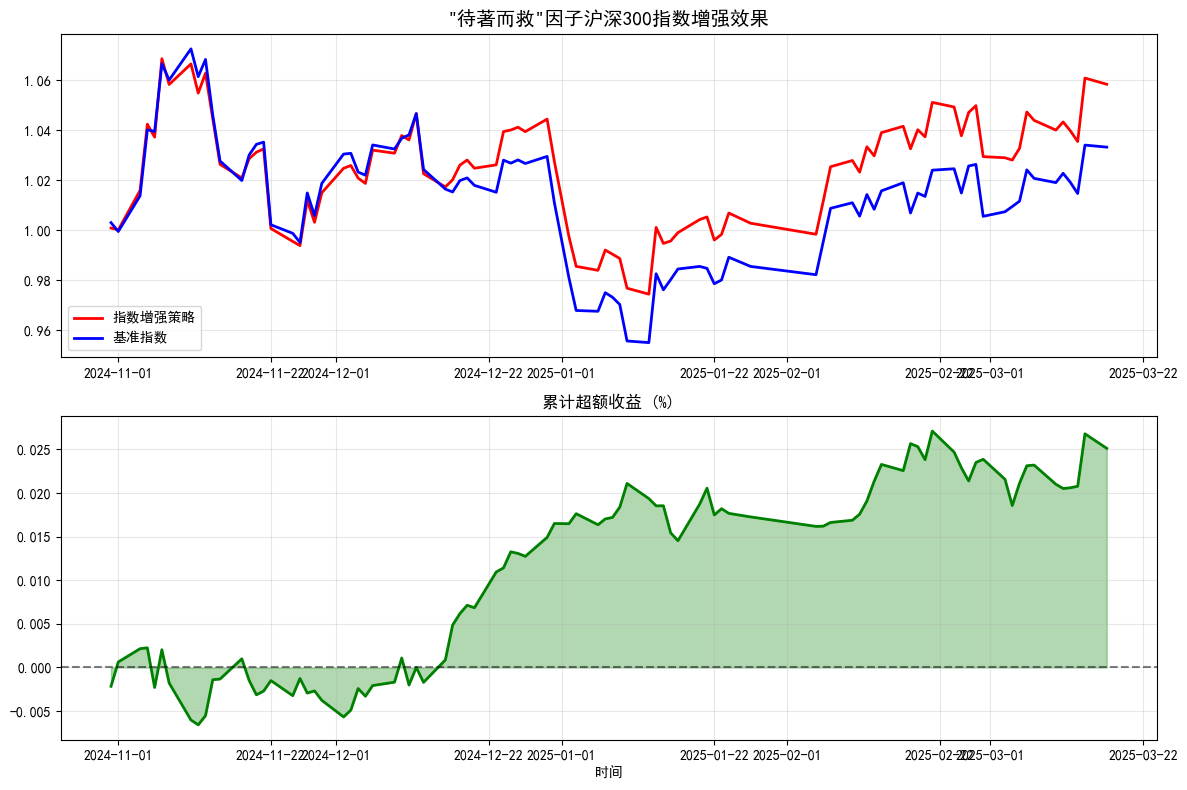

In [134]:
# Ê≤™Ê∑±300ÊâßË°åÂõûÊµã
enhanced_results = index_enhancement_backtest_with_daily_returns(final_factor, stock_df, '000300')
# ÁªòÂà∂Á¥ØËÆ°Êî∂ÁõäÊõ≤Á∫ø
plt.figure(figsize=(12, 8))

# ËΩ¨Êç¢Êó•ÊúüÊ†ºÂºè
enhanced_results['date'] = pd.to_datetime(enhanced_results['date'])

plt.subplot(2, 1, 1)
plt.plot(enhanced_results['date'], enhanced_results['portfolio_cumret'], 'r-', label='ÊåáÊï∞Â¢ûÂº∫Á≠ñÁï•', linewidth=2)
plt.plot(enhanced_results['date'], enhanced_results['benchmark_cumret'], 'b-', label='Âü∫ÂáÜÊåáÊï∞', linewidth=2)
plt.title('"ÂæÖËëóËÄåÊïë"Âõ†Â≠êÊ≤™Ê∑±300ÊåáÊï∞Â¢ûÂº∫ÊïàÊûú', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.fill_between(enhanced_results['date'], enhanced_results['excess_cumret'], 
                alpha=0.3, color='green', label='Á¥ØËÆ°Ë∂ÖÈ¢ùÊî∂Áõä')
plt.plot(enhanced_results['date'], enhanced_results['excess_cumret'], 'g-', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Á¥ØËÆ°Ë∂ÖÈ¢ùÊî∂Áõä (%)', fontsize=12)
plt.xlabel('Êó∂Èó¥')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ÂºÄÂßã000905ÂÆåÊï¥ÊåáÊï∞Â¢ûÂº∫ÂõûÊµã
üìÖ ÂõûÊµãÊúüÈó¥: 2024-10-01 ~ 2025-03-17
üìä ‰∫§ÊòìÊó•Êï∞Èáè: 108

üîÑ Ë∞É‰ªìÊó•: 2024-10-31
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 499
üìà 2024-11-05: ÁªÑÂêàÊî∂Áõä 0.0330, Ë∂ÖÈ¢ùÊî∂Áõä 0.0039

üîÑ Ë∞É‰ªìÊó•: 2024-11-29
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 499
üìà 2024-12-03: ÁªÑÂêàÊî∂Áõä -0.0022, Ë∂ÖÈ¢ùÊî∂Áõä -0.0008

üîÑ Ë∞É‰ªìÊó•: 2024-12-31
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 499
üìà 2024-12-31: ÁªÑÂêàÊî∂Áõä -0.0298, Ë∂ÖÈ¢ùÊî∂Áõä -0.0029

üîÑ Ë∞É‰ªìÊó•: 2025-01-27
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 499
üìà 2025-02-06: ÁªÑÂêàÊî∂Áõä 0.0259, Ë∂ÖÈ¢ùÊî∂Áõä 0.0048

üîÑ Ë∞É‰ªìÊó•: 2025-02-28
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 500
üìà 2025-03-06: ÁªÑÂêàÊî∂Áõä 0.0165, Ë∂ÖÈ¢ùÊî∂Áõä 0.0015

üìä ÂõûÊµãÂÆåÊàêÔºÅ
ÊÄªÊî∂Áõä: 0.0950
Âü∫ÂáÜÊî∂Áõä: 0.0602
Ë∂ÖÈ¢ùÊî∂Áõä: 0.0349


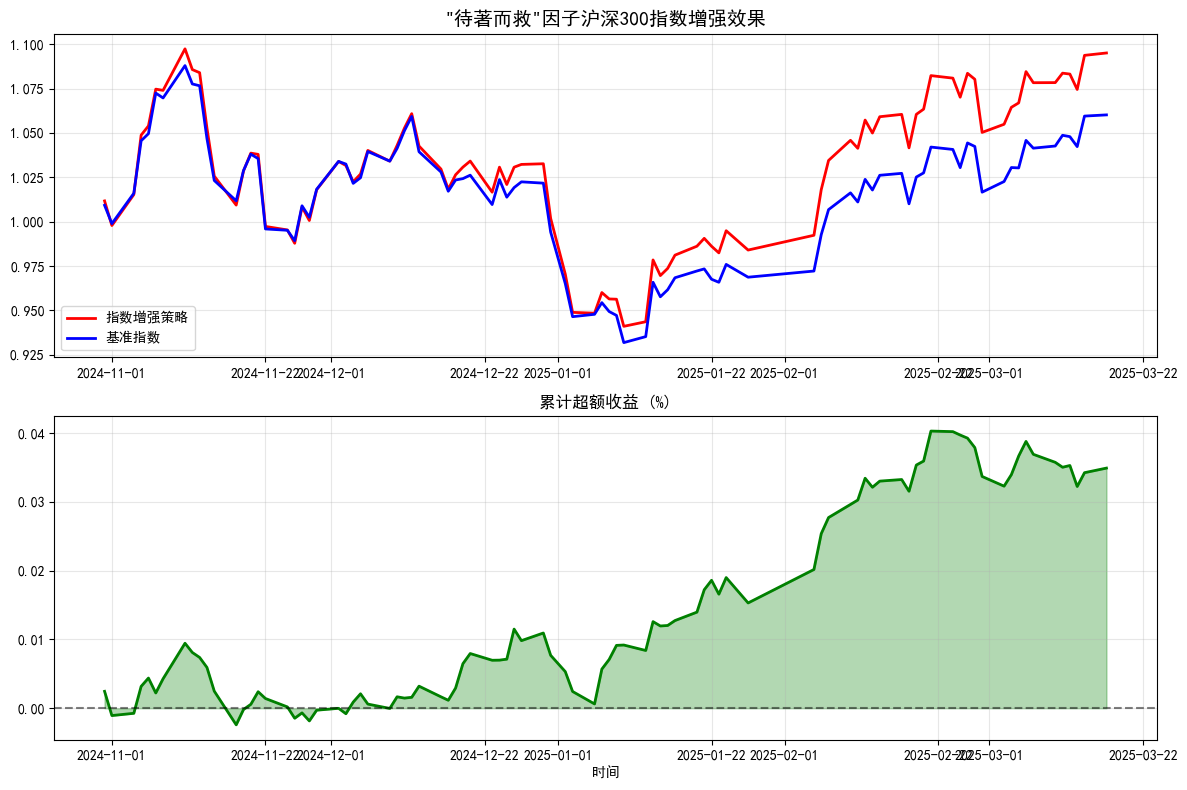

In [135]:
# ‰∏≠ËØÅ500ÊâßË°åÂõûÊµã
enhanced_results = index_enhancement_backtest_with_daily_returns(final_factor, stock_df, '000905')
# ÁªòÂà∂Á¥ØËÆ°Êî∂ÁõäÊõ≤Á∫ø
plt.figure(figsize=(12, 8))

# ËΩ¨Êç¢Êó•ÊúüÊ†ºÂºè
enhanced_results['date'] = pd.to_datetime(enhanced_results['date'])

plt.subplot(2, 1, 1)
plt.plot(enhanced_results['date'], enhanced_results['portfolio_cumret'], 'r-', label='ÊåáÊï∞Â¢ûÂº∫Á≠ñÁï•', linewidth=2)
plt.plot(enhanced_results['date'], enhanced_results['benchmark_cumret'], 'b-', label='Âü∫ÂáÜÊåáÊï∞', linewidth=2)
plt.title('"ÂæÖËëóËÄåÊïë"Âõ†Â≠êÊ≤™Ê∑±300ÊåáÊï∞Â¢ûÂº∫ÊïàÊûú', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.fill_between(enhanced_results['date'], enhanced_results['excess_cumret'], 
                alpha=0.3, color='green', label='Á¥ØËÆ°Ë∂ÖÈ¢ùÊî∂Áõä')
plt.plot(enhanced_results['date'], enhanced_results['excess_cumret'], 'g-', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Á¥ØËÆ°Ë∂ÖÈ¢ùÊî∂Áõä (%)', fontsize=12)
plt.xlabel('Êó∂Èó¥')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ÂºÄÂßã000852ÂÆåÊï¥ÊåáÊï∞Â¢ûÂº∫ÂõûÊµã
üìÖ ÂõûÊµãÊúüÈó¥: 2024-10-01 ~ 2025-03-17
üìä ‰∫§ÊòìÊó•Êï∞Èáè: 108

üîÑ Ë∞É‰ªìÊó•: 2024-10-31
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 1000
üìà 2024-11-05: ÁªÑÂêàÊî∂Áõä 0.0364, Ë∂ÖÈ¢ùÊî∂Áõä 0.0030

üîÑ Ë∞É‰ªìÊó•: 2024-11-29
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 1000
üìà 2024-12-03: ÁªÑÂêàÊî∂Áõä -0.0026, Ë∂ÖÈ¢ùÊî∂Áõä -0.0007

üîÑ Ë∞É‰ªìÊó•: 2024-12-31
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 1000
üìà 2024-12-31: ÁªÑÂêàÊî∂Áõä -0.0309, Ë∂ÖÈ¢ùÊî∂Áõä -0.0025

üîÑ Ë∞É‰ªìÊó•: 2025-01-27
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 1000
üìà 2025-02-06: ÁªÑÂêàÊî∂Áõä 0.0289, Ë∂ÖÈ¢ùÊî∂Áõä 0.0051

üîÑ Ë∞É‰ªìÊó•: 2025-02-28
‚úÖ Ëé∑ÂæóÊñ∞ÊùÉÈáçÔºåËÇ°Á•®Êï∞: 1000
üìà 2025-03-06: ÁªÑÂêàÊî∂Áõä 0.0217, Ë∂ÖÈ¢ùÊî∂Áõä 0.0034

üìä ÂõûÊµãÂÆåÊàêÔºÅ
ÊÄªÊî∂Áõä: 0.1684
Âü∫ÂáÜÊî∂Áõä: 0.1188
Ë∂ÖÈ¢ùÊî∂Áõä: 0.0496


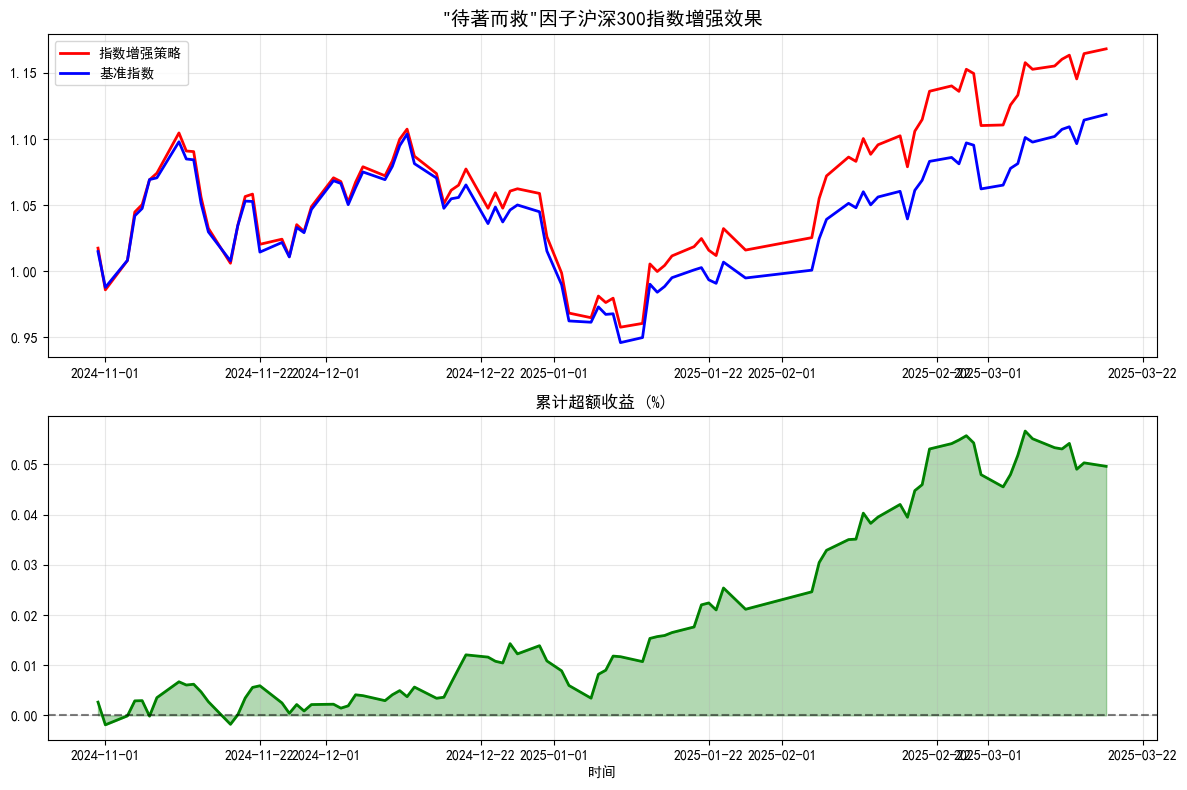

In [136]:
# ‰∏≠ËØÅ1000ÊâßË°åÂõûÊµã
enhanced_results = index_enhancement_backtest_with_daily_returns(final_factor, stock_df, '000852')
# ÁªòÂà∂Á¥ØËÆ°Êî∂ÁõäÊõ≤Á∫ø
plt.figure(figsize=(12, 8))

# ËΩ¨Êç¢Êó•ÊúüÊ†ºÂºè
enhanced_results['date'] = pd.to_datetime(enhanced_results['date'])

plt.subplot(2, 1, 1)
plt.plot(enhanced_results['date'], enhanced_results['portfolio_cumret'], 'r-', label='ÊåáÊï∞Â¢ûÂº∫Á≠ñÁï•', linewidth=2)
plt.plot(enhanced_results['date'], enhanced_results['benchmark_cumret'], 'b-', label='Âü∫ÂáÜÊåáÊï∞', linewidth=2)
plt.title('"ÂæÖËëóËÄåÊïë"Âõ†Â≠êÊ≤™Ê∑±300ÊåáÊï∞Â¢ûÂº∫ÊïàÊûú', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.fill_between(enhanced_results['date'], enhanced_results['excess_cumret'], 
                alpha=0.3, color='green', label='Á¥ØËÆ°Ë∂ÖÈ¢ùÊî∂Áõä')
plt.plot(enhanced_results['date'], enhanced_results['excess_cumret'], 'g-', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Á¥ØËÆ°Ë∂ÖÈ¢ùÊî∂Áõä (%)', fontsize=12)
plt.xlabel('Êó∂Èó¥')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2.6 Âë®È¢ëË∞É‰ªìÊÉÖÂΩ¢‰∏ã

Âë®ÂùáÂæÖËëóËÄåÊïëÂõ†Â≠êÔºö
stock_code  000001  000002  000004  000006  000007  000008  000009  000010  \
_id                                                                          
2024-09-12  2.0210  2.3580  3.2121  2.4443  1.8135  1.8310  3.2837  2.1720   
2024-09-23  2.1649  2.7964  2.6908  2.7242  2.2826  1.7325  2.9468  2.0485   
2024-09-30  2.3952  2.8243  3.1834  2.8480  2.2057  1.8642  2.8758  2.0631   
2024-10-09  2.5454  2.8914  3.2011  3.0109  2.2461  1.9578  2.9027  2.1405   
2024-10-14  2.6104  2.9225  3.1754  3.0845  2.2633  1.9972  2.8834  2.2000   

stock_code  000011  000012  000014  000016  000017  000019  000020  000021  \
_id                                                                          
2024-09-12  1.7915  1.9813  2.1224  2.0114  2.0980  2.7424  3.2447  3.1430   
2024-09-23  2.5637  1.8443  2.6344  4.3958  2.2886  2.3580  4.0363  2.9127   
2024-09-30  2.8156  1.9952  2.8582  3.6666  2.3118  2.3305  4.1740  2.8937   
2024-10-09  2.8697  2.1449  2.9856 

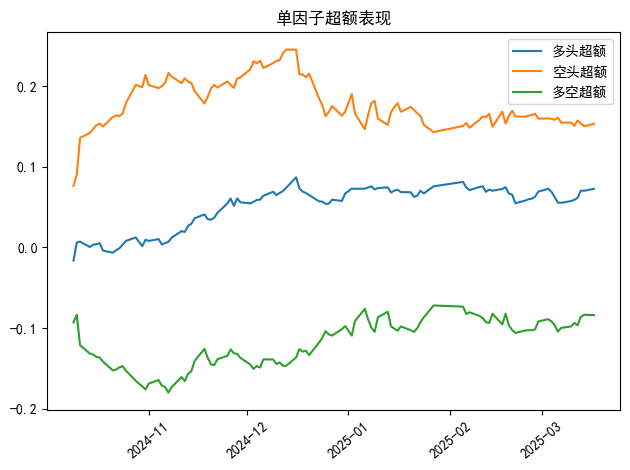

Âπ≥ÂùáÂçïËæπÊç¢ÊâãÔºö0.281
Âπ¥Âåñ‰∫§ÊòìÊàêÊú¨:0.01 (Êú™Âú®Ë∂ÖÈ¢ù‰∏≠Êâ£Èô§)


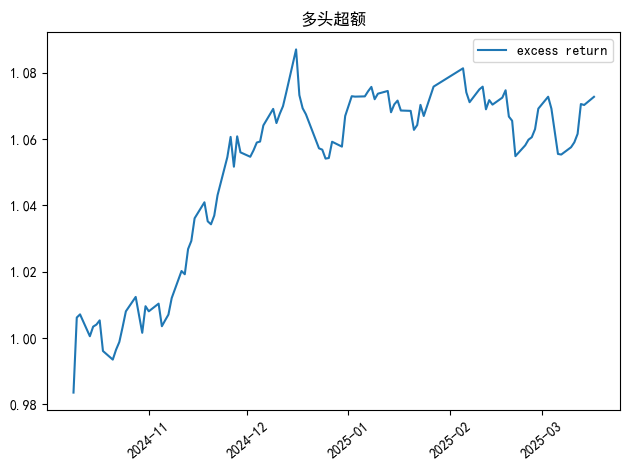


Âë®È¢ëË∞É‰ªìÂõûÊµãÁªìÊûú
Rank IC: 3.59%
Rank ICIR: 0.35
tÂÄº: 1.70
Âπ¥ÂåñÊî∂ÁõäÁéá: 17.12%
Âπ¥ÂåñÊ≥¢Âä®Áéá: 8.27%
‰ø°ÊÅØÊØîÁéá: 2.07
Â§èÊôÆÊØîÁéá: 2.07
ÊúÄÂ§ßÂõûÊí§: 3.06%


In [154]:
from config import load_data_local, prepare_dates, neutralize, backtest_stand
import numpy as np

# 1. ÂØπÊØèÂè™ËÇ°Á•®ËÆ°ÁÆóËøáÂéª20Â§©ÁöÑrollingÂùáÂÄºÂíåÊ†áÂáÜÂ∑ÆÔºà‰øùÊåÅ‰∏çÂèòÔºâ
mean_20d = factor_pivot.rolling(window=20, min_periods=1).mean()
std_20d = factor_pivot.rolling(window=20, min_periods=1).std()

start_date = '2024-09-11'
end_date = '2025-03-17'

# ÂÖ≥ÈîÆ‰øÆÊîπ1ÔºöÊîπ‰∏∫Âë®È¢ëÊó•Êúü
week_end_dates = prepare_dates(start_date, end_date, fre='week')  # Êîπ‰∏∫'week'

# ÂÖ≥ÈîÆ‰øÆÊîπ2ÔºöÊåâÂë®Êú´Êó•ÊúüÂèñÊï∞ÊçÆ
weekly_mean = factor_pivot.rolling(window=20, min_periods=1).mean().loc[week_end_dates]
weekly_std = factor_pivot.rolling(window=20, min_periods=1).std().loc[week_end_dates]

# Â∞ÜindexËΩ¨ÂõûstrÊ†ºÂºèÁöÑYYYY-MM-DD
weekly_mean.index = weekly_mean.index.strftime('%Y-%m-%d')
weekly_std.index = weekly_std.index.strftime('%Y-%m-%d')

# Á°Æ‰øùcolumns‰∏∫6‰ΩçstrÊ†ºÂºèÁöÑËÇ°Á•®‰ª£Á†Å
weekly_mean.columns = weekly_mean.columns.astype(str).str.zfill(6)
weekly_std.columns = weekly_std.columns.astype(str).str.zfill(6)

# ËÆ°ÁÆóÂêàÊàêÁöÑ"ÂæÖËëóËÄåÊïë"Âõ†Â≠êÔºàÁ≠âÊùÉÂπ≥ÂùáÔºâ
final_factor_weekly = (weekly_mean + weekly_std) / 2
final_factor_weekly.columns = final_factor_weekly.columns.astype(str).str.zfill(6)

print("Âë®ÂùáÂæÖËëóËÄåÊïëÂõ†Â≠êÔºö")
print(weekly_mean.head())
print("\nÂë®Á®≥ÂæÖËëóËÄåÊïëÂõ†Â≠êÔºö")
print(weekly_std.head())
print("\nÂë®È¢ëÂæÖËëóËÄåÊïëÂõ†Â≠êÔºö")
print(final_factor_weekly.head())

# ÂÖ≥ÈîÆ‰øÆÊîπ3ÔºöÂë®È¢ëÂõûÊµã
pkg_path = r'C:\Users\ZHOU\Documents\2025CUHK\ÂÖ¥Èì∂\ÈúÄË¶ÅÊã∑ÁöÑÊï∞ÊçÆ\\'
res_weekly = backtest_stand(
    -final_factor_weekly,  # ‰ΩøÁî®Âë®È¢ëÂõ†Â≠êÊï∞ÊçÆ
    fre='week',    # Êîπ‰∏∫Âë®È¢ëË∞É‰ªì
    stock_pool='888888',
    benchmark='b4',
    barra_neutral=True, 
    top=300,
    localdata_path=pkg_path+'packages/frdata',
    start='2024-10-01',
    end='2025-03-17'
)

# ËÆ°ÁÆóÂë®È¢ëÂõûÊµãÁªìÊûú
rank_ic_weekly = res_weekly['ic']['ic'].mean()
rank_icir_weekly = res_weekly['ic']['ic'].mean() / res_weekly['ic']['ic'].std()
t_value_weekly = res_weekly['ic']['ic'].mean() / (res_weekly['ic']['ic'].std() / np.sqrt(res_weekly['ic']['ic'].count()))

perf_weekly = res_weekly['Â§öÁ©∫Ë°®Áé∞']['Â§öÂ§¥Ë°®Áé∞']  
annual_return_weekly = perf_weekly.loc['Âπ¥ÂåñË∂ÖÈ¢ù', 'mean']
annual_vol_weekly = perf_weekly.loc['Ê≥¢Âä®Áéá', 'mean']
info_ratio_weekly = annual_return_weekly / annual_vol_weekly
max_drawdown_weekly = perf_weekly.loc['ÊúÄÂ§ßÂõûÊí§', 'mean']
sharpe_ratio_weekly = annual_return_weekly / annual_vol_weekly

print("\n" + "="*50)
print("Âë®È¢ëË∞É‰ªìÂõûÊµãÁªìÊûú")
print("="*50)
print(f"Rank IC: {rank_ic_weekly:.2%}")
print(f"Rank ICIR: {rank_icir_weekly:.2f}")
print(f"tÂÄº: {t_value_weekly:.2f}")
print(f"Âπ¥ÂåñÊî∂ÁõäÁéá: {annual_return_weekly:.2%}")
print(f"Âπ¥ÂåñÊ≥¢Âä®Áéá: {annual_vol_weekly:.2%}")
print(f"‰ø°ÊÅØÊØîÁéá: {info_ratio_weekly:.2f}")
print(f"Â§èÊôÆÊØîÁéá: {sharpe_ratio_weekly:.2f}")
print(f"ÊúÄÂ§ßÂõûÊí§: {max_drawdown_weekly:.2%}")

In [147]:
res_weekly['Â§öÁ©∫ÊåÅ‰ªì']['Á©∫Â§¥ÊåÅ‰ªì']

[600050   0.0164
 000725   0.0156
 601728   0.0142
 688479   0.0133
 688055   0.0130
           ...  
 600693   0.0084
 002300   0.0084
 301323   0.0084
 002342   0.0084
 688070   0.0084
 Name: 2024-10-09, Length: 100, dtype: float64,
 600050   0.0160
 000725   0.0155
 600959   0.0142
 601728   0.0135
 688244   0.0130
           ...  
 688070   0.0084
 600869   0.0084
 688272   0.0083
 600880   0.0083
 000563   0.0107
 Name: 2024-10-15, Length: 101, dtype: float64,
 600050   0.0161
 000725   0.0156
 600959   0.0147
 601728   0.0140
 688479   0.0139
           ...  
 002255   0.0085
 601002   0.0085
 601869   0.0085
 002969   0.0084
 002583   0.0087
 Name: 2024-10-22, Length: 101, dtype: float64,
 600959   0.0150
 600050   0.0140
 000725   0.0140
 688479   0.0128
 688500   0.0126
           ...  
 688237   0.0107
 601399   0.0093
 002694   0.0087
 600865   0.0086
 002583   0.0087
 Name: 2024-10-29, Length: 105, dtype: float64,
 600959   0.0150
 688683   0.0138
 688060   0.0131
 002546  